> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Gap Minder]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
<b> In this mini project, I plan to understand the trend in income inequality, income and education in different countries as well as their relationships from six datasets pre-processed by Gap Minder.
   * The first dataset is income_per_person_gdppercapita_ppp_inflation_adjusted, which provides income information in 196 different countries and areas from 1799 to 2049. 
   * The second dataset is gini, which provides income inequality information (measured in gini coefficients) in 195 different countries and areas from 1799 to 2049. 
   * The last four datasets are about education: mean_years_in_school_men_15_to_24_years, mean_years_in_school_women_15_to_24_years, mean_years_in_school_men_25_years_and_older, and mean_years_in_school_women_25_years_and_older. The first two datasets provide education information (measured in average school years) in 188  different countries and areas from 1969 to 2014 and the last two provide education information in 175 different countries and areas from 1969 to 2008.

<b> In each of these datasets, the index is country and areas and each column is one year. After data wrangling and cleaning, I will contruct a new dataset in which the columns are country, year, income, gini, education(15 to 24 years old), education (25 years and older) and gender. The contructed dataset will be used for analysis.

### Question(s) for Analysis
<b> As mentioned, the general goal of this mini project is to understand the trend in income inequality, income and education in different countries and their relationships. In addition, I will focus on the top five economies (the United States, China, Japan, Germany and India). Here, I will outline the specific research questions:
    
    1. What is the trend in income inequality in the top 5 economies?
    2. What is the trend in income in the top 5 economies?
    3. What is the relationship between income and income inequality in the top 5 economies?
    
    4. What is the trend in education in the top 5 economies?
    
    5. How does income affects education attainment in the top 5 economies?
    6. How does income inequality affects education attainment in the top 5 economies?
    7. How does gender affects education attainment in the top 5 economies?

--------

In [1]:
!pip install pandas

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline
pd.set_option('display.max_rows', 50) 

In [10]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

In [ ]:
pd.options.display.max_rows = 500

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

<a id='wrangling'></a>
## Data Wrangling and Cleaning

> <b> Note that will I combin data wrangling and data cleaning, because they usually go together. Markdowns will outline the rationales behind each operation.


### General Properties
> <b> As mentioned, the orignally datasets are all organized as country (indices) * year (columns) format which is unfriendly to data analysis. I will wrangle and clean the orignal datasets and construct a new dataset for data analysis.
    
### Data Cleaning
> <b> Rationales for each cleaning step is outlined. 

-------------

#### DATA WRANGLING and CLEANING PART I (income and income inequality)

**read the gini dataset & check duplicates**

In [2]:
url_gini = '/Users/jinyanxiang/Desktop/DS & ML/Udacity/Data Analyst/Project 2_Gap Minder/Data/gini.csv'
df_gini = pd.read_csv(url_gini,index_col=0)
df_gini.duplicated().value_counts()

False    196
True       1
dtype: int64

**drop duplicates in the gini dataset & check shape of gini data**

In [3]:
df_gini.drop_duplicates(inplace=True)
df_gini.shape

(196, 251)

**read the income dataset & check duplicates**

In [4]:
url_income = '/Users/jinyanxiang/Desktop/DS & ML/Udacity/Data Analyst/Project 2_Gap Minder/Data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv'
df_income = pd.read_csv(url_income,index_col=0)
df_income.duplicated().value_counts()

False    195
dtype: int64

**check the shape of the income dataset**

In [5]:
df_income.shape

(195, 251)

**figure out the missing country in the income dataset**

In [6]:
set(list(df_gini.index))-set(list(df_income.index))

{'Holy See'}

**drop 'Holy See' from the gini dataset and recheck its shape**

In [7]:
df_gini.drop(index = 'Holy See',inplace = True)
df_gini.shape

(195, 251)

**combine the gini and income datasets and reorganize it into [country, year, DVs]**

*step 1: create a multi-index*

In [8]:
year = list(np.arange(1799,2050,dtype = 'int64'))
country = list(df_gini.index)
indices = pd.MultiIndex.from_product([country,year],names = ['country','year'])
len(indices)

48945

*step 2: stack each dataset and check the length*

In [9]:
gini_value = df_gini.stack().tolist()
income_value= df_income.stack().tolist()
print(len(gini_value))
print(len(income_value))
len(gini_value) == len(income_value)

48945
48945


True

*step 3: create the new dataset*

In [10]:
df_gini_income = indices.to_frame(index=False)
df_gini_income ['gini'] = gini_value
df_gini_income ['income'] = income_value

*step 4: check teh new dataset*

In [11]:
print(df_gini_income.shape)
df_gini_income.head()

(48945, 4)


,country,year,gini,income
0,Afghanistan,1799,30.5,674
1,Afghanistan,1800,30.5,674
2,Afghanistan,1801,30.5,674
3,Afghanistan,1802,30.5,674
4,Afghanistan,1803,30.5,674


**convert 1k to 1000 in the income column & check**

In [13]:
df_gini_income['income'] = df_gini_income['income'].replace({'k': '*1e3'}, regex=True).map(pd.eval).astype(int)

In [14]:
df_gini_income.query("country == 'United States'")

,country,year,gini,income
46184,United States,1799,57.0,2930
46185,United States,1800,57.0,2980
46186,United States,1801,57.0,3030
46187,United States,1802,57.0,2980
46188,United States,1803,57.0,2980
...,...,...,...,...
46430,United States,2045,42.5,99200
46431,United States,2046,42.5,101000
46432,United States,2047,42.5,103000
46433,United States,2048,42.5,106000


------------

#### DATA WRANGLING and CLEANING PART II (education)

**read all education datasets and check the shapes and duplicates of each dataset (and drop duplicates if applicable)**

In [16]:
url_men_edu_15to24 = '/Users/jinyanxiang/Desktop/DS & ML/Udacity/Data Analyst/Project 2_Gap Minder/Data/mean_years_in_school_men_15_to_24_years.csv'
df_men_edu_15to24 = pd.read_csv(url_men_edu_15to24,index_col=0)

print('shape:', df_men_edu_15to24.shape)
print('duplicates:','\n',df_men_edu_15to24.duplicated().value_counts())

df_men_edu_15to24.head()

shape: (188, 46)
duplicates: 
 False    186
True       2
dtype: int64


,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.82,1.87,1.92,1.97,2.02,2.07,2.12,2.17,2.23,2.28,...,4.33,4.43,4.53,4.63,4.73,4.84,4.94,5.05,5.16,5.27
Angola,2.25,2.31,2.36,2.42,2.48,2.54,2.60,2.67,2.73,2.80,...,5.10,5.21,5.32,5.43,5.55,5.66,5.78,5.90,6.02,6.14
Albania,5.47,5.58,5.69,5.80,5.91,6.02,6.13,6.24,6.36,6.47,...,9.89,10.00,10.20,10.30,10.40,10.60,10.70,10.90,11.00,11.20
Andorra,9.16,9.30,9.44,9.58,9.72,9.86,10.00,10.10,10.30,10.40,...,13.90,14.10,14.20,14.30,14.40,14.50,14.60,14.70,14.80,14.90
United Arab Emirates,4.24,4.35,4.47,4.58,4.71,4.83,4.96,5.09,5.23,5.37,...,10.60,10.70,10.90,11.10,11.20,11.40,11.50,11.70,11.80,12.00


In [17]:
df_men_edu_15to24.drop_duplicates(inplace=True)
df_men_edu_15to24.shape

(186, 46)

In [18]:
url_women_edu_15to24 = '/Users/jinyanxiang/Desktop/DS & ML/Udacity/Data Analyst/Project 2_Gap Minder/Data/mean_years_in_school_women_15_to_24_years.csv'
df_women_edu_15to24 = pd.read_csv(url_women_edu_15to24,index_col=0)

print('shape:', df_women_edu_15to24.shape)
print('duplicates:','\n',df_women_edu_15to24.duplicated().value_counts())

df_women_edu_15to24.head()

shape: (188, 46)
duplicates: 
 False    186
True       2
dtype: int64


,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.48,0.50,0.51,0.53,0.55,0.57,0.59,0.61,0.63,0.65,...,1.60,1.66,1.71,1.77,1.82,1.88,1.94,2.00,2.07,2.13
Angola,1.64,1.69,1.74,1.80,1.85,1.91,1.97,2.03,2.10,2.16,...,4.77,4.90,5.03,5.16,5.30,5.43,5.57,5.71,5.85,6.00
Albania,4.99,5.11,5.24,5.36,5.49,5.62,5.75,5.88,6.02,6.15,...,10.20,10.40,10.50,10.70,10.90,11.00,11.20,11.40,11.50,11.70
Andorra,9.50,9.67,9.84,10.00,10.20,10.30,10.50,10.70,10.80,11.00,...,15.00,15.10,15.30,15.40,15.50,15.60,15.70,15.80,16.00,16.10
United Arab Emirates,4.18,4.31,4.45,4.58,4.72,4.87,5.02,5.18,5.34,5.50,...,11.40,11.60,11.80,12.00,12.20,12.30,12.50,12.70,12.80,13.00


In [19]:
df_women_edu_15to24.drop_duplicates(inplace=True)
df_women_edu_15to24.shape

(186, 46)

In [20]:
url_men_edu_25plus = '/Users/jinyanxiang/Desktop/DS & ML/Udacity/Data Analyst/Project 2_Gap Minder/Data/mean_years_in_school_men_25_years_and_older.csv'
df_men_edu_25plus = pd.read_csv(url_men_edu_25plus,index_col=0)

print('shape:', df_men_edu_25plus.shape)
print('duplicates:','\n',df_men_edu_25plus.duplicated().value_counts())

df_men_edu_25plus.head()

shape: (175, 40)
duplicates: 
 False    175
dtype: int64


,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.7,0.7,0.8,0.8,0.8,0.9,0.9,0.9,1.0,1.0,...,2.1,2.1,2.2,2.3,2.3,2.4,2.4,2.5,2.6,2.6
Angola,1.4,1.5,1.5,1.6,1.7,1.7,1.8,1.9,2.0,2.0,...,4.0,4.1,4.3,4.4,4.5,4.6,4.7,4.9,5.0,5.1
Albania,5.1,5.2,5.3,5.5,5.6,5.7,5.9,6.0,6.1,6.3,...,9.1,9.2,9.4,9.5,9.6,9.8,9.9,10.0,10.1,10.2
United Arab Emirates,3.0,3.1,3.2,3.3,3.5,3.6,3.8,3.9,4.1,4.2,...,8.0,8.2,8.4,8.5,8.7,8.8,9.0,9.2,9.3,9.5
Argentina,5.9,6.0,6.1,6.2,6.3,6.4,6.6,6.7,6.8,6.9,...,8.9,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8


In [21]:
url_women_edu_25plus = '/Users/jinyanxiang/Desktop/DS & ML/Udacity/Data Analyst/Project 2_Gap Minder/Data/mean_years_in_school_women_25_years_and_older.csv'
df_women_edu_25plus = pd.read_csv(url_women_edu_25plus,index_col=0)

print('shape:', df_women_edu_25plus.shape)
print('duplicates:','\n',df_women_edu_25plus.duplicated().value_counts())

df_women_edu_25plus.head()

shape: (175, 40)
duplicates: 
 False    175
dtype: int64


,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.4
Angola,0.5,0.5,0.5,0.5,0.6,0.6,0.6,0.7,0.7,0.7,...,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8
Albania,3.9,4.0,4.1,4.2,4.3,4.5,4.6,4.7,4.8,4.9,...,8.0,8.2,8.3,8.5,8.6,8.8,8.9,9.1,9.2,9.4
United Arab Emirates,1.5,1.6,1.7,1.8,1.9,2.0,2.2,2.3,2.4,2.6,...,6.4,6.6,6.9,7.1,7.3,7.5,7.7,7.9,8.1,8.3
Argentina,5.5,5.6,5.7,5.9,6.0,6.1,6.2,6.3,6.5,6.6,...,9.1,9.2,9.3,9.4,9.5,9.6,9.8,9.9,10.0,10.1


**figure out the missing country in the 25plus edu datasets**

In [22]:
missing_countries = set(list(df_men_edu_15to24.index))-set(list(df_men_edu_25plus.index))
missing_countries

{'Andorra',
 'Barbados',
 'Bhutan',
 'Brunei',
 'Dominica',
 'Iceland',
 'Libya',
 'Malta',
 'Micronesia, Fed. Sts.',
 'North Korea',
 'South Sudan'}

In [23]:
missing_countries = list(missing_countries)
len(missing_countries)

11

**drop these countries because they are not the focus of the research questions (none of these countries is top 5 economies)**

In [24]:
df_men_edu_15to24.drop(index = missing_countries, inplace = True)
df_men_edu_15to24.shape

(175, 46)

In [25]:
df_women_edu_15to24.drop(index = missing_countries, inplace = True)
df_women_edu_15to24.shape

(175, 46)

**do not drop year 2009 to 2014 in the 15to24 datasets because they are useful in understanding the education trend**

*step 1: create year 2009 to 2014 columns and add NA values to the 25plus datasets for columns year 2009-2014*

In [26]:
missing_years = list(np.arange(2009,2015,dtype = 'int64').astype(str))

In [27]:
missing_years 

['2009', '2010', '2011', '2012', '2013', '2014']

In [239]:
df_men_edu_25plus[missing_years] = " "
df_women_edu_25plus[missing_years] = " "

In [240]:
print(df_men_edu_25plus.shape)
print(df_women_edu_25plus.shape)

(175, 46)
(175, 46)


*step 2: create a multi-index, stack the original datasets*

In [241]:
year2 = list(np.arange(1969,2015,dtype = 'int64'))
country2 = list(df_men_edu_15to24.index)
indices2 = pd.MultiIndex.from_product([country2,year2],names = ['country','year'])
len(indices2)

8050

In [242]:
men_edu_15to24_value = df_men_edu_15to24.stack().tolist()
women_edu_15to24_value= df_women_edu_15to24.stack().tolist()
men_edu_25plus_value = df_men_edu_25plus.stack().tolist()
women_edu_25plus_value= df_women_edu_25plus.stack().tolist()


print(len(men_edu_15to24_value))
print(len(women_edu_15to24_value))
print(len(men_edu_25plus_value))
print(len(women_edu_25plus_value))

8050
8050
8050
8050


*step 3: create two seperate datasets by gender*

In [243]:
df_edu_men = indices2.to_frame(index=False)
df_edu_men['edu_15to24'] = men_edu_15to24_value
df_edu_men['edu_25plus'] = men_edu_25plus_value

In [244]:
male = np.repeat('male', df_edu_men.shape[0])
df_edu_men['gender'] = list(male)

In [245]:
df_edu_men.head()

,country,year,edu_15to24,edu_25plus,gender
0,Afghanistan,1969,1.82,0.70,male
1,Afghanistan,1970,1.87,0.70,male
2,Afghanistan,1971,1.92,0.80,male
3,Afghanistan,1972,1.97,0.80,male
4,Afghanistan,1973,2.02,0.80,male


In [246]:
df_edu_women = indices2.to_frame(index=False)
df_edu_women['edu_15to24'] = women_edu_15to24_value
df_edu_women['edu_25plus'] = women_edu_25plus_value

In [247]:
female = np.repeat('female', df_edu_women.shape[0])
df_edu_women['gender'] = list(female)

In [248]:
df_edu_women.head()

,country,year,edu_15to24,edu_25plus,gender
0,Afghanistan,1969,0.48,0.00,female
1,Afghanistan,1970,0.50,0.10,female
2,Afghanistan,1971,0.51,0.10,female
3,Afghanistan,1972,0.53,0.10,female
4,Afghanistan,1973,0.55,0.10,female


*step 4: combine two datasets (by gender)*

In [249]:
df_edu = df_edu_men.append(df_edu_women,sort=False)

In [254]:
df_edu.replace(" ",np.nan,inplace=True)

In [255]:
df_edu

,country,year,edu_15to24,edu_25plus,gender
0,Afghanistan,1969,1.82,0.70,male
1,Afghanistan,1970,1.87,0.70,male
2,Afghanistan,1971,1.92,0.80,male
3,Afghanistan,1972,1.97,0.80,male
4,Afghanistan,1973,2.02,0.80,male
...,...,...,...,...,...
8045,Zimbabwe,2010,10.10,NaN,female
8046,Zimbabwe,2011,10.30,NaN,female
8047,Zimbabwe,2012,10.40,NaN,female
8048,Zimbabwe,2013,10.60,NaN,female


---------

#### DATA WRANGLING and CLEANING PART III (final dataset for analysis)

*step 1: combine income/inequality and edu datasets*

In [256]:
df = df_gini_income.merge(df_edu,how = 'outer')

In [257]:
df.head()

,country,year,gini,income,edu_15to24,edu_25plus,gender
0,Afghanistan,1799,30.50,674,NaN,NaN,NaN
1,Afghanistan,1800,30.50,674,NaN,NaN,NaN
2,Afghanistan,1801,30.50,674,NaN,NaN,NaN
3,Afghanistan,1802,30.50,674,NaN,NaN,NaN
4,Afghanistan,1803,30.50,674,NaN,NaN,NaN


*step 2: select top 5 economies which is the focus of the research questions*

In [258]:
query_country = "country == 'United States' or country == 'China' or country == 'Japan' or country == 'Germany' or country == 'India'"

In [259]:
df_top5 = df.query(query_country).reset_index(drop=True)
print(df_top5.shape)
df_top5.head()

(1485, 7)


,country,year,gini,income,edu_15to24,edu_25plus,gender
0,China,1799,44.90,1070,NaN,NaN,NaN
1,China,1800,44.90,1060,NaN,NaN,NaN
2,China,1801,44.90,1060,NaN,NaN,NaN
3,China,1802,44.90,1060,NaN,NaN,NaN
4,China,1803,44.90,1050,NaN,NaN,NaN


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1-3
    1. What is the trend in income inequality in the top 5 economies?
    2. What is the trend in income in the top 5 economies?
    3. What is the relationship between income and income inequality in the top 5 economies (other than the US)?

#### Q1: What is the trend in income inequality in the top 5 economies?

In [44]:
sns.set_theme(style="whitegrid", palette="pastel")

**create a line chart to virsualize the trend in Income Inequality from 1799 to 2050**

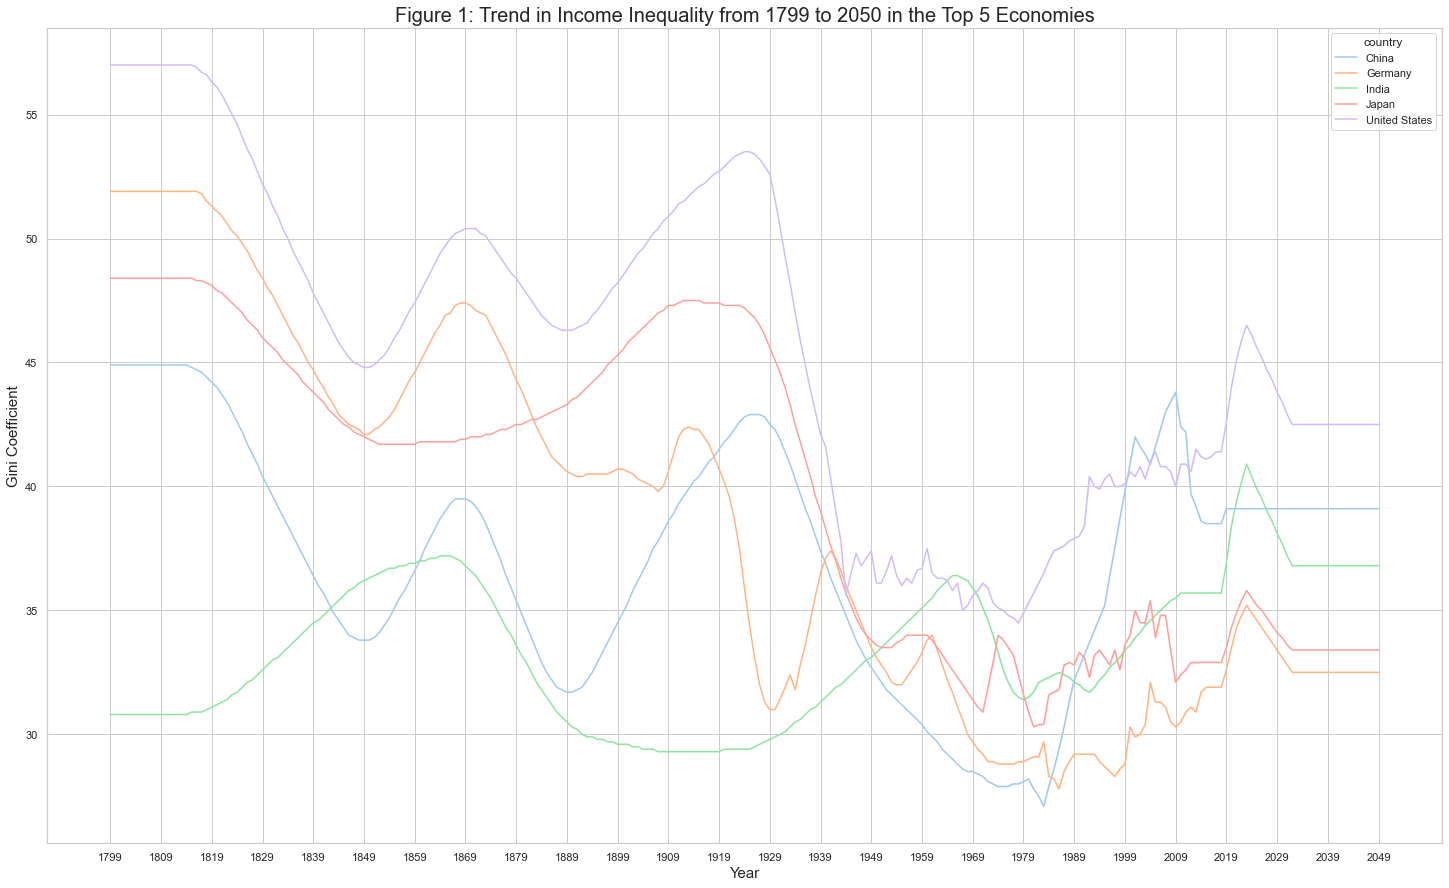

In [50]:
plt.figure(figsize = (25,15))
plt.title('Figure 1: Trend in Income Inequality from 1799 to 2050 in the Top 5 Economies', {'fontsize':20})

plt.xlabel('Year',{'fontsize':15})
plt.ylabel('Gini Coefficient',{'fontsize':15})

plt.xticks((np.arange(1799, 2050, step=10)) )

sns.lineplot(x="year", y="gini", hue = 'country', data=df_top5)
plt.show()

**Figure 1 shows the trend in each country from 1970 to 20020 is tangling and thus create a line chart that focuses on this time period**

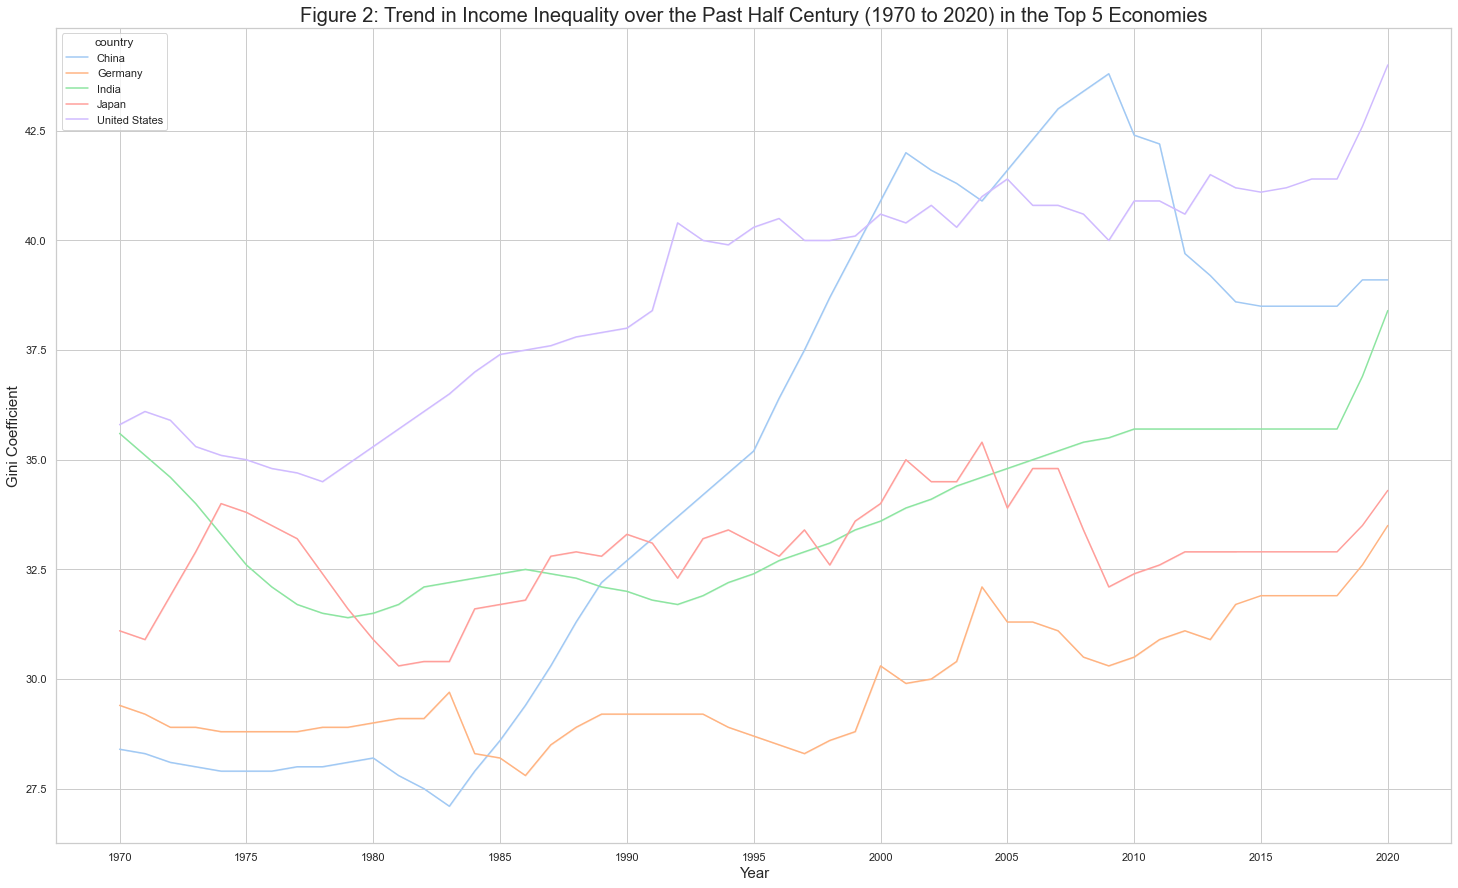

In [54]:
plt.figure(figsize = (25,15))
plt.title('Figure 2: Trend in Income Inequality over the Past Half Century (1970 to 2020) in the Top 5 Economies', {'fontsize':20})

plt.xlabel('Year',{'fontsize':15})
plt.ylabel('Gini Coefficient',{'fontsize':15})

plt.xticks((np.arange(1970, 2021, step=5)))


sns.lineplot(x="year", y="gini", hue = 'country', data=df_top5.query('year >= 1970 and year <= 2020'))
plt.show()

**create a bar chart to virsualize the average income inequality across the top 5 economies in each decade**

*step 1: create a new datasets for this virtualization task*

In [56]:
yearlist = list(np.arange(1799,2050,10, dtype = 'int64'))
gini_mean=[]
for i in range(len(yearlist)-1):
    gini_m = df_top5[(df_top5['year'] >= yearlist[i]) & (df_top5['year']<= yearlist[i+1])].gini.mean()
    gini_m_round = round(gini_m, 2)
    gini_mean.append(gini_m_round)
#gini_mean

In [57]:
yearlabel = []

yearlist = list(np.arange(1799,2050,10, dtype = 'int64'))
for i in range(len(yearlist)-1):
    label = str(yearlist[i]) + '-' + str(yearlist[i+1])
    yearlabel.append(label)
#yearlabel

In [58]:
gini_top5_ave = pd.DataFrame(gini_mean,yearlabel).reset_index()
gini_top5_ave = gini_top5_ave.rename(columns = {'index': 'year',0:'gini'})

*step 2: create a bar chart*

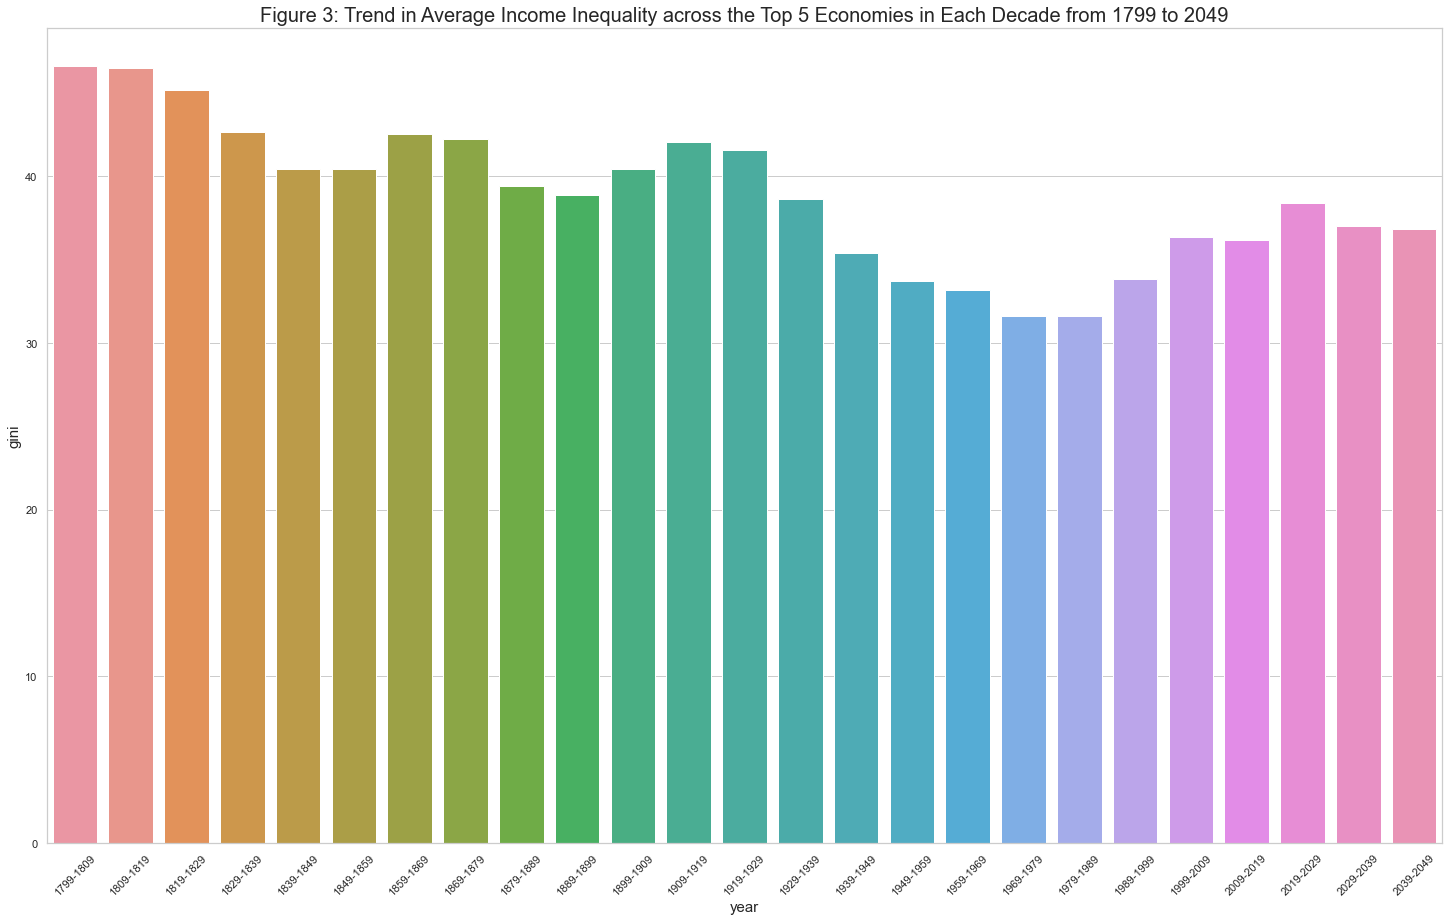

In [60]:
plt.figure(figsize = (25,15))
plt.title('Figure 3: Trend in Average Income Inequality across the Top 5 Economies in Each Decade from 1799 to 2049', {'fontsize':20})


plt.xlabel('Decades',{'fontsize':15})
plt.ylabel('Gini Coefficient',{'fontsize':15})
plt.xticks(rotation = 45)

sns.barplot(x="year", y="gini", data=gini_top5_ave)
plt.show()

**calculate the average gini in each top 5 economy**

In [102]:
gini_stat = df_top5.query('year >= 1970 and year <= 2020').groupby(['country']).agg({'gini':['mean','min','max','std'],})
gini_stat

gini                 
               mean   min   max  std
country                             
China         34.71 27.10 43.80 5.85
Germany       29.69 27.80 33.50 1.22
India         33.57 31.40 38.40 1.63
Japan         32.86 30.30 35.40 1.21
United States 38.67 34.50 44.00 2.45

#### Takeaways from Figure 1 to 3 and the statistics table: 
* There was an overall downward trend of income inequality from 18th century to 1960s and an overall upward trend since 1970s till the next decade. Income inequality is predicted to be flatten after 2029.
* In the past half centuary, the US, China and India exprienced dramatic increase in income inequality, and the biggest leap was found in China from 1980 to 2010 which almost doubled (due to China's open door policy). 
* China witnessed the largest fluctuation (SD = 5.85) while income inequality just moderately flucutated in Japan (SD = 1.21) and Germany (SD = 1.22) over the past half century.
* On average, the US (M = 38.67) has the largest while Germany (M = 29.69) has the smallest income inequality among the top 5 economies over the past half century.

#### Q2: What is the trend in income in the top 5 economies?

**create a line chart to virsualize the trend in Income from 1799 to 2050**

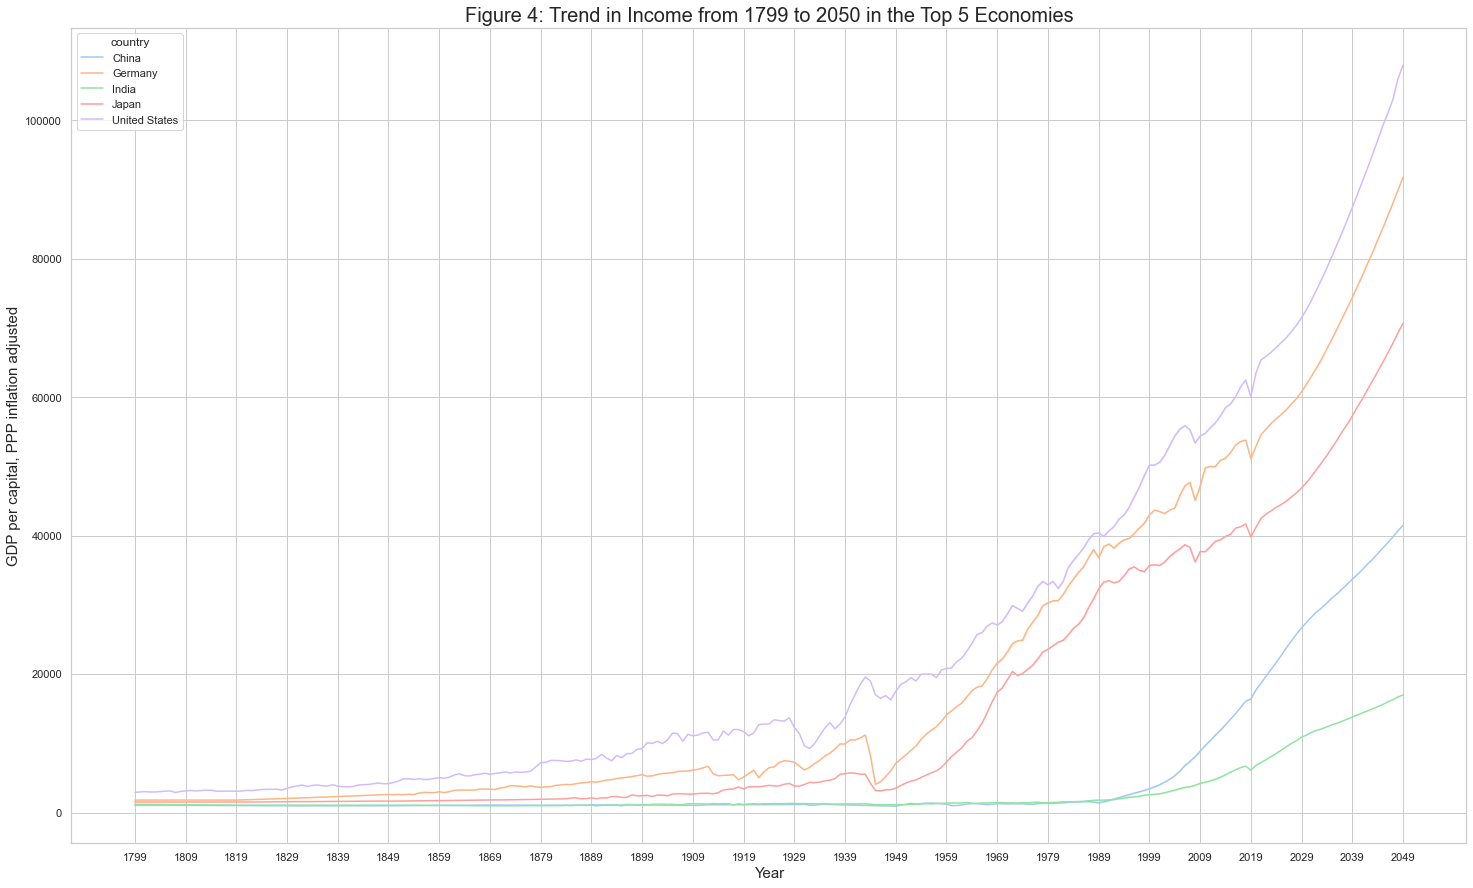

In [81]:
plt.figure(figsize = (25,15))
plt.title('Figure 4: Trend in Income from 1799 to 2050 in the Top 5 Economies', {'fontsize':20})

plt.xlabel('Year',{'fontsize':15})
plt.ylabel('GDP per capital, PPP inflation adjusted',{'fontsize':15})

plt.xticks((np.arange(1799, 2050, step=10)) )

sns.lineplot(x="year", y="income", hue = 'country', data=df_top5)
plt.show()

**create a line chart to virsualize the trend in Income Inequality from 1970 to 2020**

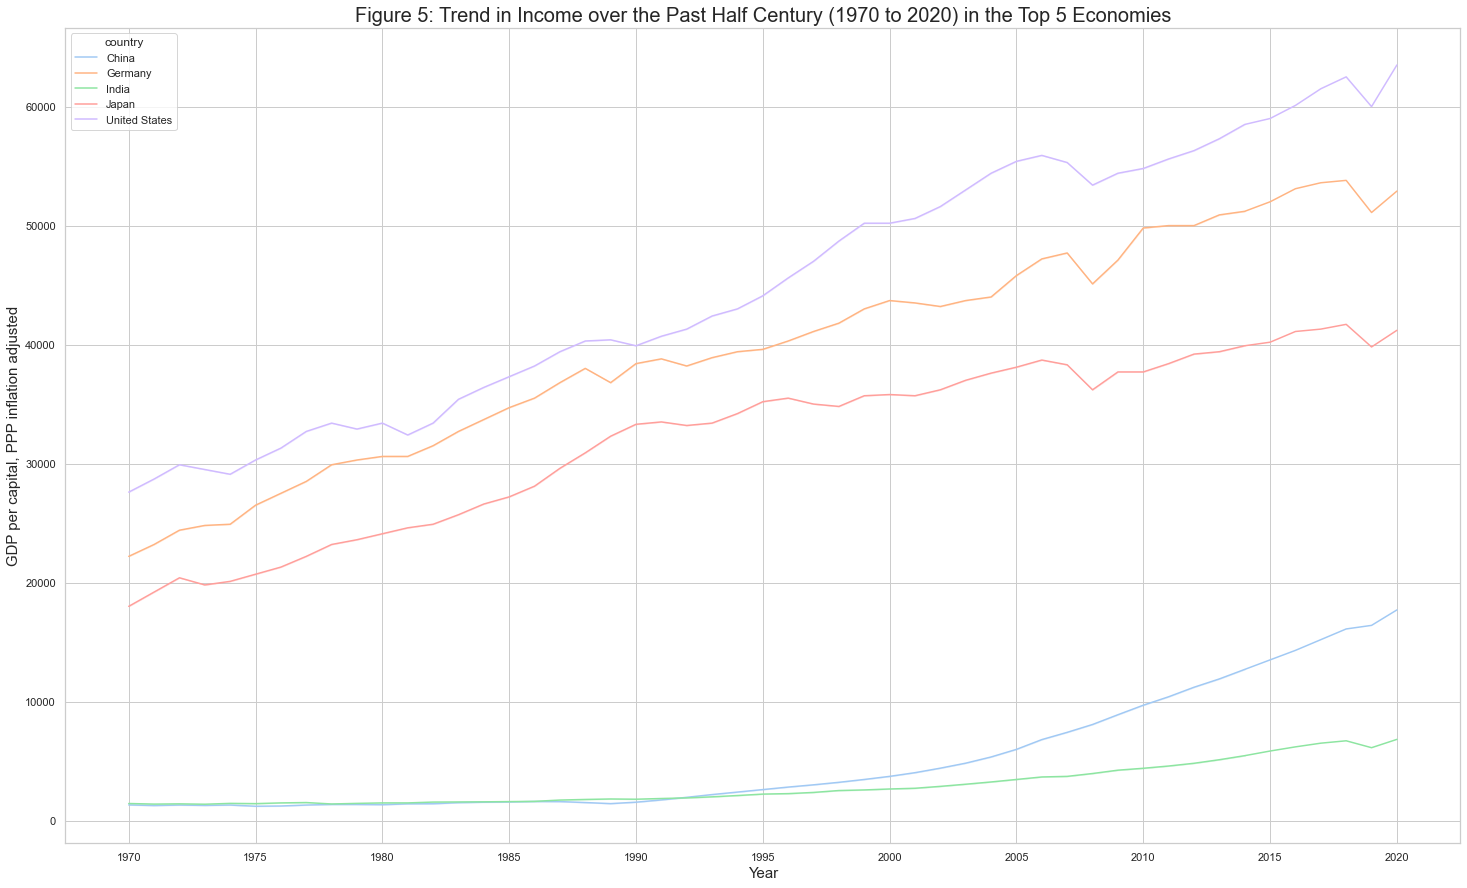

In [87]:
plt.figure(figsize = (25,15))
plt.title('Figure 5: Trend in Income over the Past Half Century (1970 to 2020) in the Top 5 Economies', {'fontsize':20})

plt.xlabel('Year',{'fontsize':15})
plt.ylabel('GDP per capital, PPP inflation adjusted',{'fontsize':15})

plt.xticks((np.arange(1970, 2021, step=5)))


sns.lineplot(x="year", y="income", hue = 'country', data=df_top5.query('year >= 1970 and year <= 2020'))
plt.show()

**create a bar chart to virsualize the average income cross the top 5 economies in each decade**

In [88]:
income_mean=[]
for i in range(len(yearlist)-1):
    income_m = df_top5[(df_top5['year'] >= yearlist[i]) & (df_top5['year']<= yearlist[i+1])].income.mean()
    income_m_round = round(income_m, 2)
    income_mean.append(income_m_round)
#income_mean

In [89]:
income_top5_ave = pd.DataFrame(income_mean,yearlabel).reset_index()
income_top5_ave = income_top5_ave.rename(columns = {'index': 'year',0:'income'})

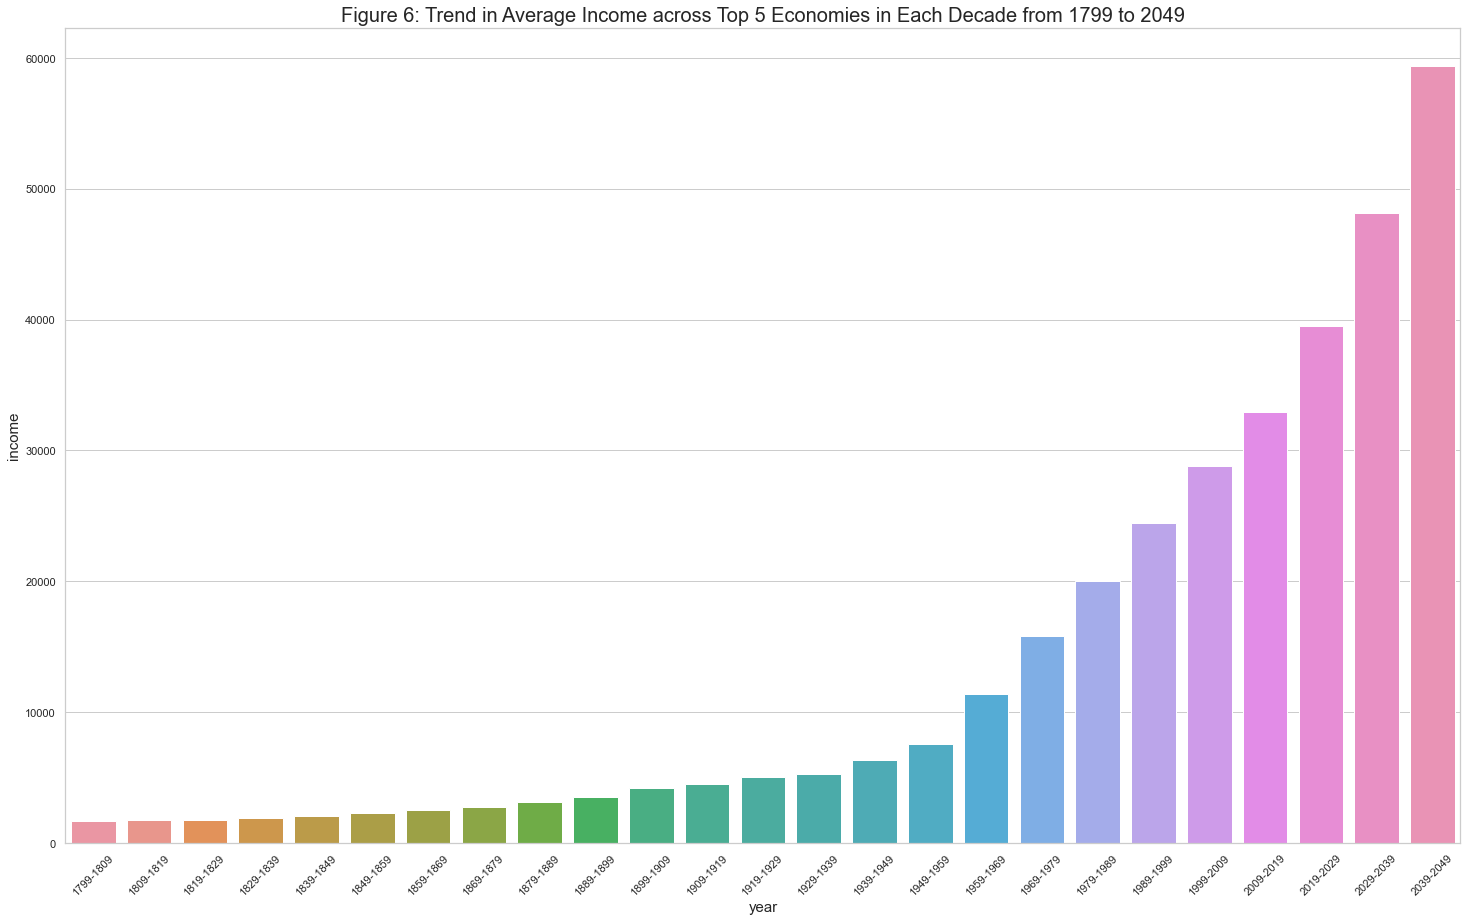

In [90]:
plt.figure(figsize = (25,15))
plt.title('Figure 6: Trend in Average Income across Top 5 Economies in Each Decade from 1799 to 2049', {'fontsize':20})


plt.xlabel('Decades',{'fontsize':15})
plt.ylabel('Gini Coefficient',{'fontsize':15})
plt.xticks(rotation = 45)

sns.barplot(x="year", y="income", data=income_top5_ave)
plt.show()

**calculate the average income in each top 5 economy**

In [97]:
income_stat = df_top5.query('year >= 1970 and year <= 2020').groupby(['country']).agg({'income':['mean','min','max','std']})

In [100]:
income_stat[('income', 'dif')] = income_stat[('income', 'max')] - income_stat[('income', 'min')]

In [101]:
income_stat

income                              
                  mean    min    max      std    dif
country                                             
China          4468.96   1200  17700  4322.98  16500
Germany       38828.12  22200  53800  8774.80  31600
India          2685.52   1370   6820  1475.68   5450
Japan         31559.35  18000  41700  7053.56  23700
United States 44060.42  27600  63500 10435.75  35900

#### Takeaways from Figure 4 to 6 and the statistics table: 
* There was an overall upward trend of income from 18th century and upward slop became more steeper since 1950s for developed countries (i.e.,the US, Japan and Germany) while since 1990s for developing countries (i.e., China and India).
* On average, the US (M = 44060.42, DIF = 35900) has the highest while India (M = 2685.52) has the lowest income as well as smallest increase in income among the top 5 economies over the past half century.

#### Q3. What is relationship between income and income inequality in the top 5 economies?

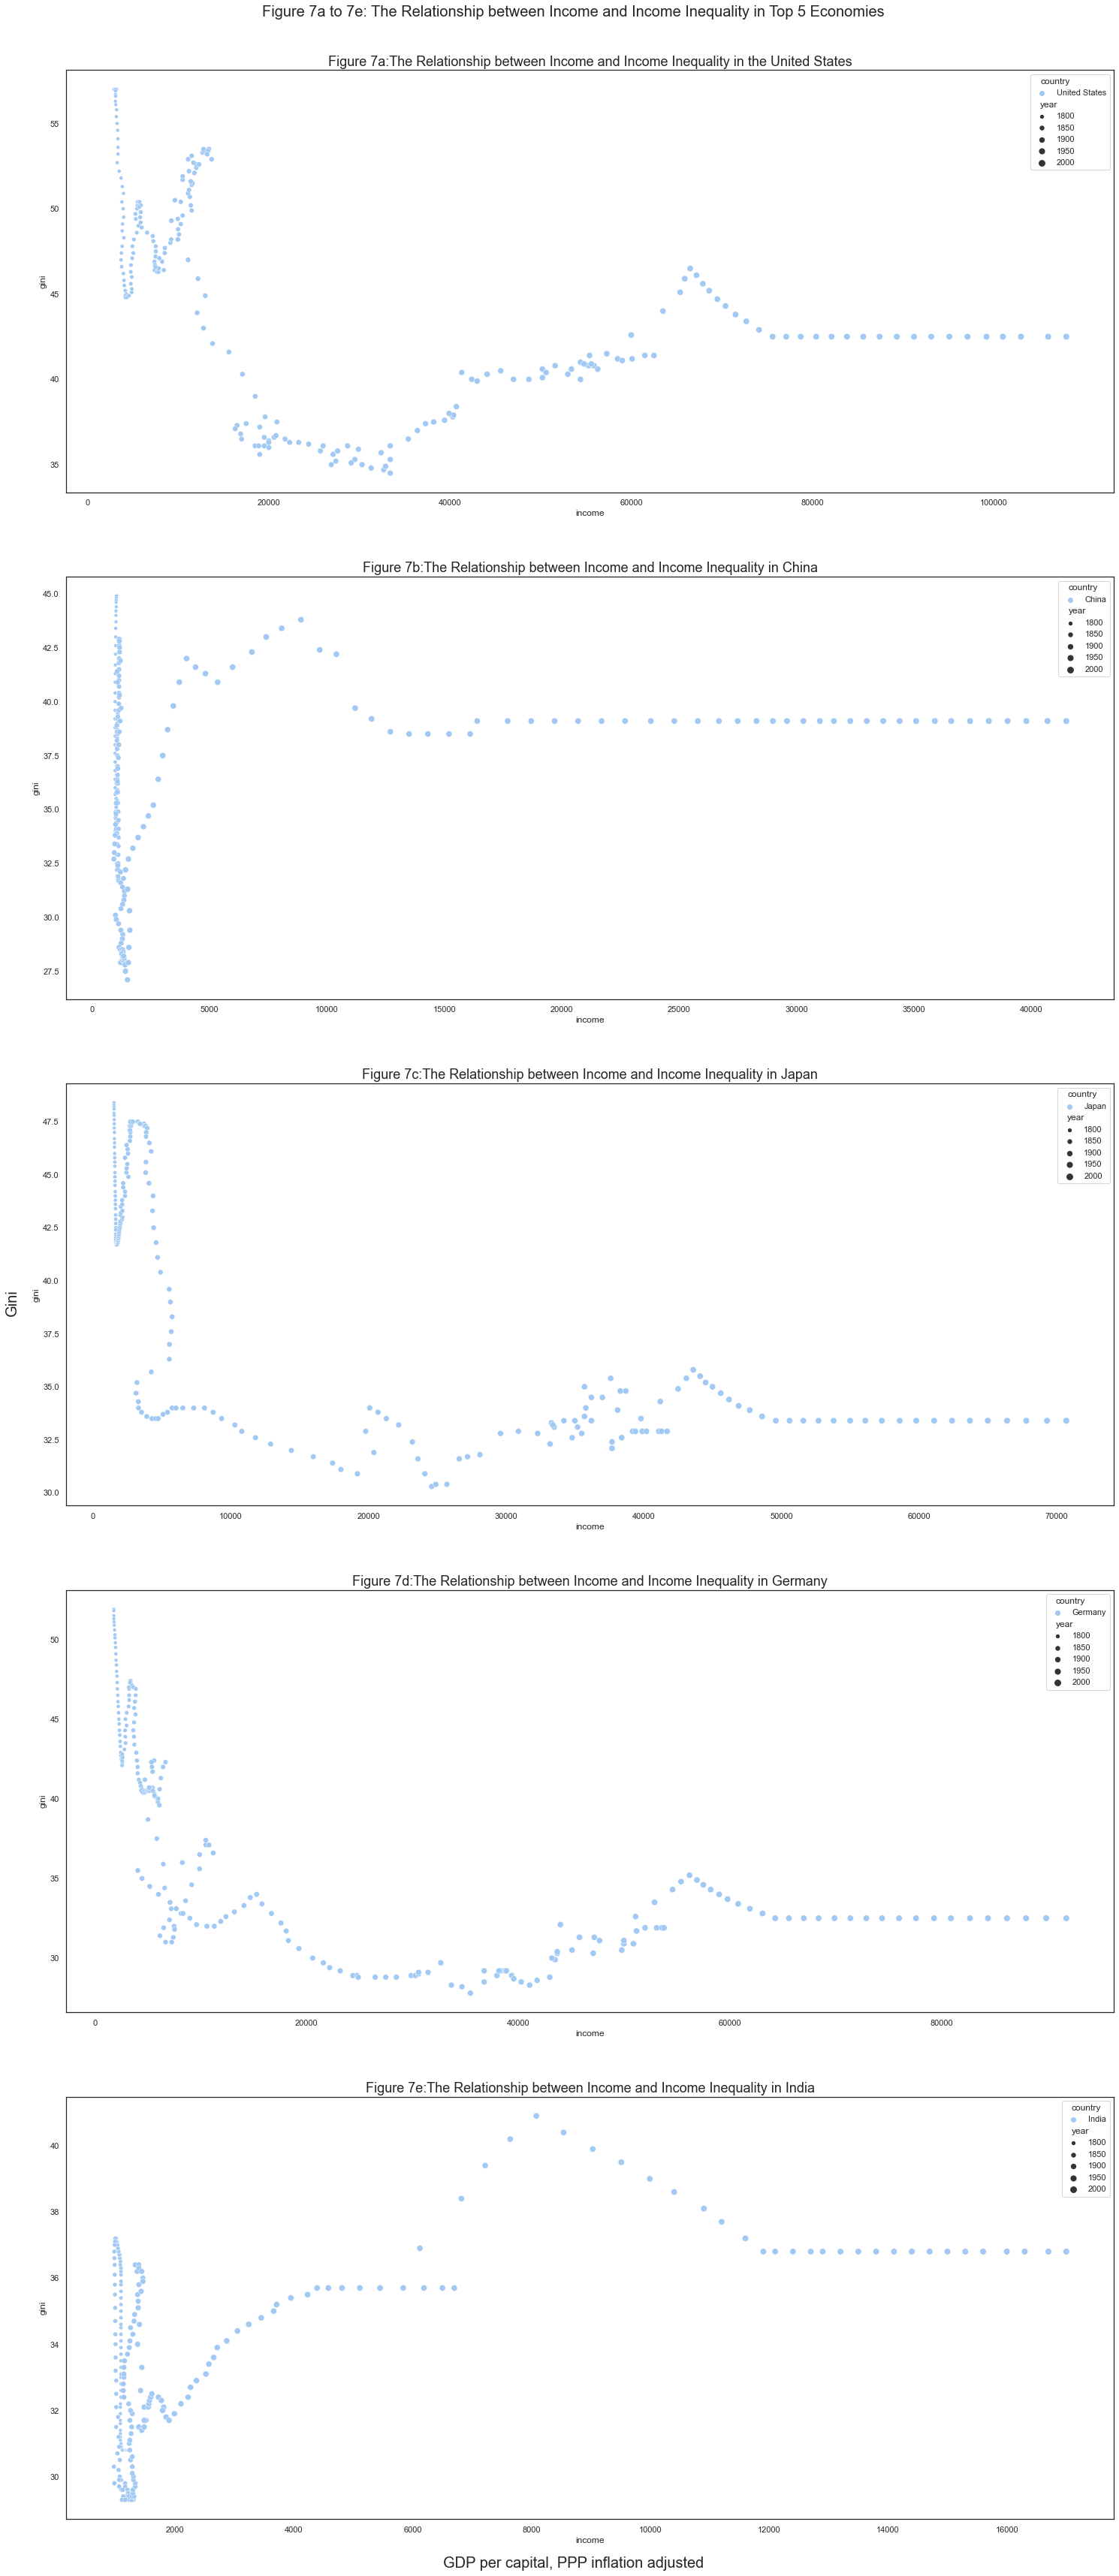

In [195]:
fig, axes = plt.subplots(5, 1, sharex=False, figsize=(25,60))

fig.suptitle('Figure 7a to 7e: The Relationship between Income and Income Inequality in Top 5 Economies',fontsize = 20,y=0.9)
fig.text(0.5, 0.11, 'GDP per capital, PPP inflation adjusted', ha='center', fontsize = 20)
fig.text(0.08, 0.5, 'Gini', va='center', rotation='vertical', fontsize = 20)

sns.scatterplot(ax=axes[0,], data=df_top5.query('country == "United States"'), x="income", y="gini", hue = 'country', size = 'year')
axes[0,].set_title("Figure 7a:The Relationship between Income and Income Inequality in the United States", fontsize = 18)

sns.scatterplot(ax=axes[1,], data=df_top5.query('country == "China"'), x="income", y="gini", hue = 'country', size = 'year')
axes[1,].set_title("Figure 7b:The Relationship between Income and Income Inequality in China", fontsize = 18)

sns.scatterplot(ax=axes[2,], data=df_top5.query('country == "Japan"'), x="income", y="gini", hue = 'country', size = 'year')
axes[2,].set_title("Figure 7c:The Relationship between Income and Income Inequality in Japan", fontsize = 18)

sns.scatterplot(ax=axes[3,], data=df_top5.query('country == "Germany"'), x="income", y="gini", hue = 'country', size = 'year')
axes[3,].set_title("Figure 7d:The Relationship between Income and Income Inequality in Germany", fontsize = 18)

sns.scatterplot(ax=axes[4,], data=df_top5.query('country == "India"'), x="income", y="gini", hue = 'country', size = 'year')
axes[4,].set_title("Figure 7e:The Relationship between Income and Income Inequality in India", fontsize = 18)

plt.show()

**calculate the correlation between gini and income**

In [156]:
df_gini_income_top5 = df_gini_income.query(query_country)

In [274]:
df_gini_income_top5.drop(columns='year').groupby(['country']).corr()

gini  income
country                           
China         gini    1.00    0.18
              income  0.18    1.00
Germany       gini    1.00   -0.65
              income -0.65    1.00
India         gini    1.00    0.54
              income  0.54    1.00
Japan         gini    1.00   -0.72
              income -0.72    1.00
United States gini    1.00   -0.49
              income -0.49    1.00

In [273]:
df_gini_income_top5.query('year >= 1970 and year <= 2020').drop(columns='year').groupby(['country']).corr()

gini  income
country                           
China         gini    1.00    0.65
              income  0.65    1.00
Germany       gini    1.00    0.76
              income  0.76    1.00
India         gini    1.00    0.83
              income  0.83    1.00
Japan         gini    1.00    0.51
              income  0.51    1.00
United States gini    1.00    0.94
              income  0.94    1.00

In [272]:
df_gini_income_top5.query('year <= 1970').drop(columns='year').groupby(['country']).corr()

gini  income
country                           
China         gini    1.00   -0.30
              income -0.30    1.00
Germany       gini    1.00   -0.80
              income -0.80    1.00
India         gini    1.00   -0.24
              income -0.24    1.00
Japan         gini    1.00   -0.69
              income -0.69    1.00
United States gini    1.00   -0.78
              income -0.78    1.00

#### Takeaways from Figure 7a to 7e and the statistics table: 
* There was a strong negative correlations between income and income inequality from 1799 to 1970 in developed countries (i.e., Germany (r = - 0.80), the US (r = -0.78) and Japan (r = -0.69)) and weak correlations between the two variables in developing countries (i.e., China (r = -0.30) and India (r = 0.69)).
* Over the past half century, income and income inequality had moderate to strong positive correlation in the top 5 economies, ranging from the modest 0.51 (Japan) to the highest 0.94 (the US).

-----------

### Research Question 4
    4. What is the trend in education in the top 5 economies?

#### Q4. What is the trend in education in the top 5 economies?

In [166]:
sns.set_theme(style="white", palette="pastel")

**create line charts to virsualize the trend**

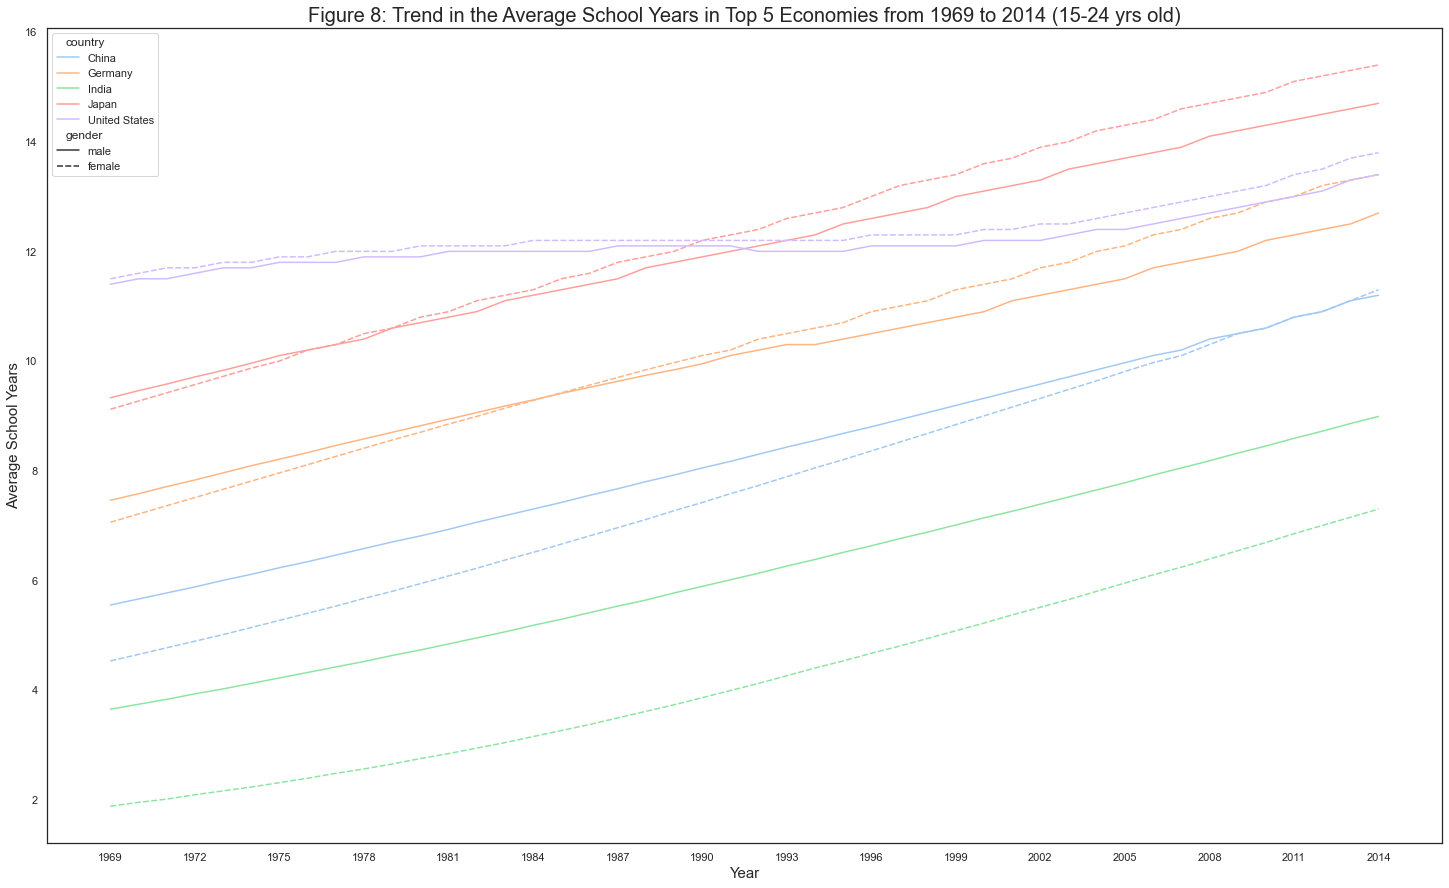

In [184]:
plt.figure(figsize = (25,15))
plt.title('Figure 8: Trend in the Average School Years in Top 5 Economies from 1969 to 2014 (15-24 yrs old)', {'fontsize':20})

plt.xlabel('Year',{'fontsize':15})
plt.ylabel('Average School Years',{'fontsize':15})

plt.xticks((np.arange(1969, 2015, step=3)))


sns.lineplot(x="year", y="edu_15to24", hue = 'country', style = 'gender', data=df_top5)
plt.show()

<AxesSubplot:title={'center':'Figure 9: Trend in Average School Years in Top 5 Economies from 1969 to 2014 (25+ yrs old)'}, xlabel='Year', ylabel='Average School Years'>

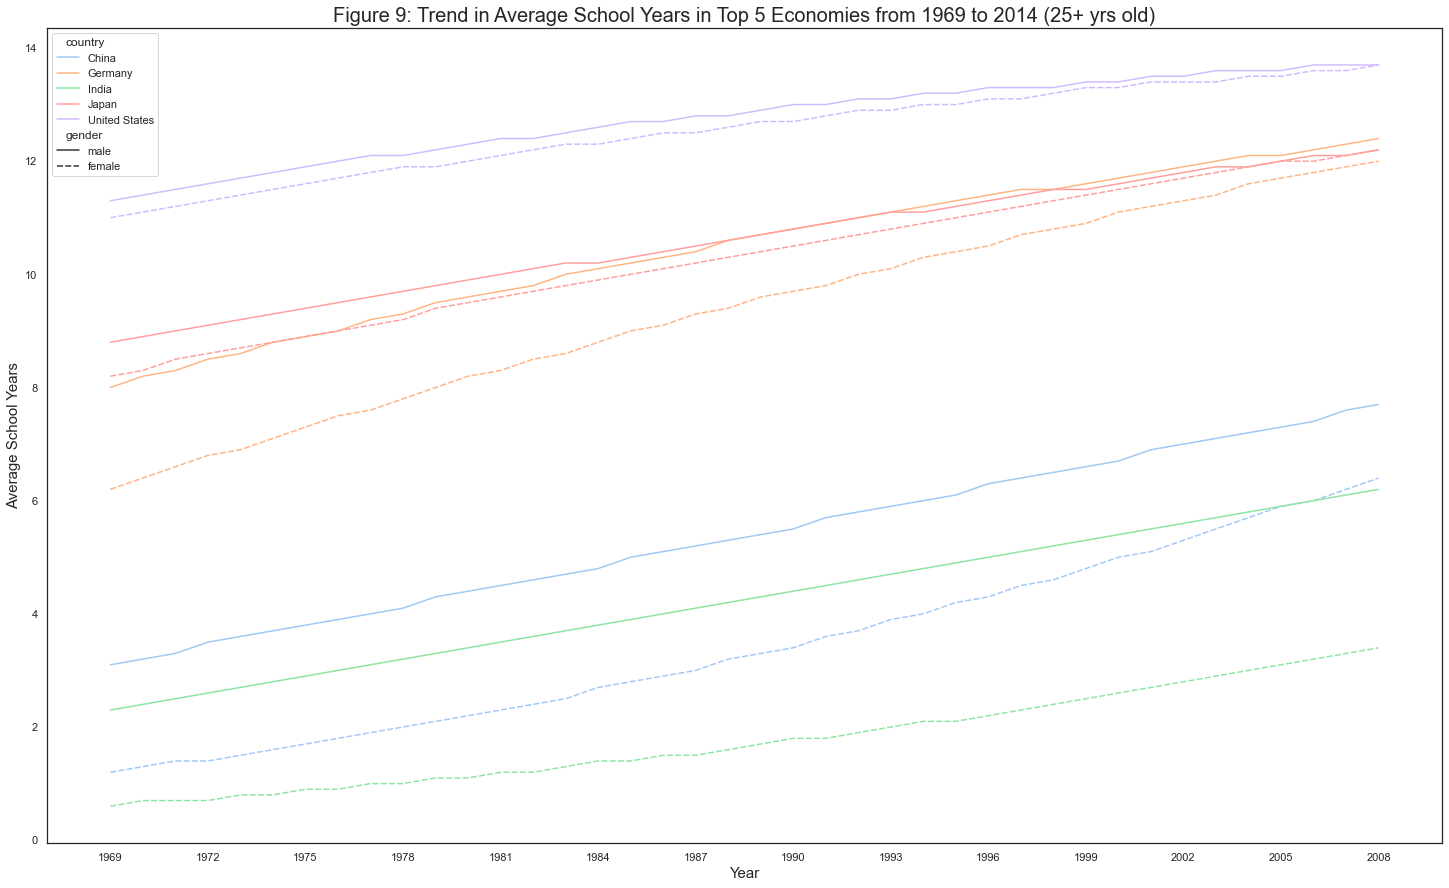

In [185]:
plt.figure(figsize = (25,15))
plt.title('Figure 9: Trend in Average School Years in Top 5 Economies from 1969 to 2014 (25+ yrs old)', {'fontsize':20})

plt.xlabel('Year',{'fontsize':15})
plt.ylabel('Average School Years',{'fontsize':15})

plt.xticks((np.arange(1969, 2015, step=3)))


sns.lineplot(x="year", y="edu_25plus", hue = 'country', style = 'gender', data=df_top5.query('year<=2008'))

**calulate the statistics for education (average school years)**

In [264]:
df_top5.groupby(['country','gender']).agg({'edu_15to24':['mean','min','max','std'],'edu_25plus':['mean','min','max','std']})

edu_15to24                  edu_25plus                 
                           mean   min   max  std       mean   min   max  std
country       gender                                                        
China         female       7.74  4.53 11.30 2.04       3.43  1.20  6.40 1.57
              male         8.28  5.55 11.20 1.69       5.38  3.10  7.70 1.37
Germany       female      10.27  7.06 13.40 1.87       9.36  6.20 12.00 1.74
              male        10.07  7.46 12.70 1.51      10.46  8.00 12.40 1.31
India         female       4.25  1.88  7.30 1.66       1.78  0.60  3.40 0.84
              male         6.15  3.65  8.99 1.61       4.25  2.30  6.20 1.17
Japan         female      12.36  9.12 15.40 1.89      10.31  8.20 12.20 1.20
              male        12.06  9.33 14.70 1.61      10.61  8.80 12.20 1.03
United States female      12.36 11.50 13.80 0.53      12.54 11.00 13.70 0.79
              male        12.16 11.40 13.40 0.45      12.75 11.30 13.70 0.72

#### Takeaways from Figure 8 and 9 and the statistics table: 
* There was an overall upward trend of education attainment in all 4 out of the top 5 economies for people between 15 and 24 years old (except for the US), irrespective of gender. The US education attainment for this age groups is relatively flat. 
* There was also an overall upward trend of education attainment in all top 5 economies for people irrespective of gender.
* India has the largest gender gap in education attainment in both age groups (DIFs > 2ys), and the gender gaps in education attainment in Japan and the US are negligible (DIFs < 0.5 yrs). Unfornately, the gender gap in in India for the older age group is widening.
* Interestingly, China has a large gender gap in education attainment in the older age group (25 yrs +) (DIF = 1.95 yrs) but the gender is diminishing in the younger age group (15-24 yrs old)) (DIF = 0.54 yrs) due to the improvement in economy and the spread of compulsory eduction. Also, the gender gap in the older age group is narrowing as younger generations grow up.
* India has the lowest education attainment (in average school years) for people between 15 and 24 years old (M = 8.01) and 25 years old and older (M = 3.01); by contrast, the US has the highest education attainment for people between 15 to 24 years old (M = 12.26) and 25 years old and older (M = 12.64)

### Research Question 5 to 7
    5. How does income affects education attainment in the top 5 economies?
    6. How does income inequality affects education attainment in the top 5 economies?
    7. How does gender affects education attainment in the top 5 economies?

#### Q5. How does income affects education attainment in the top 5 economies?

**create scatter plots to virsualize the trends**

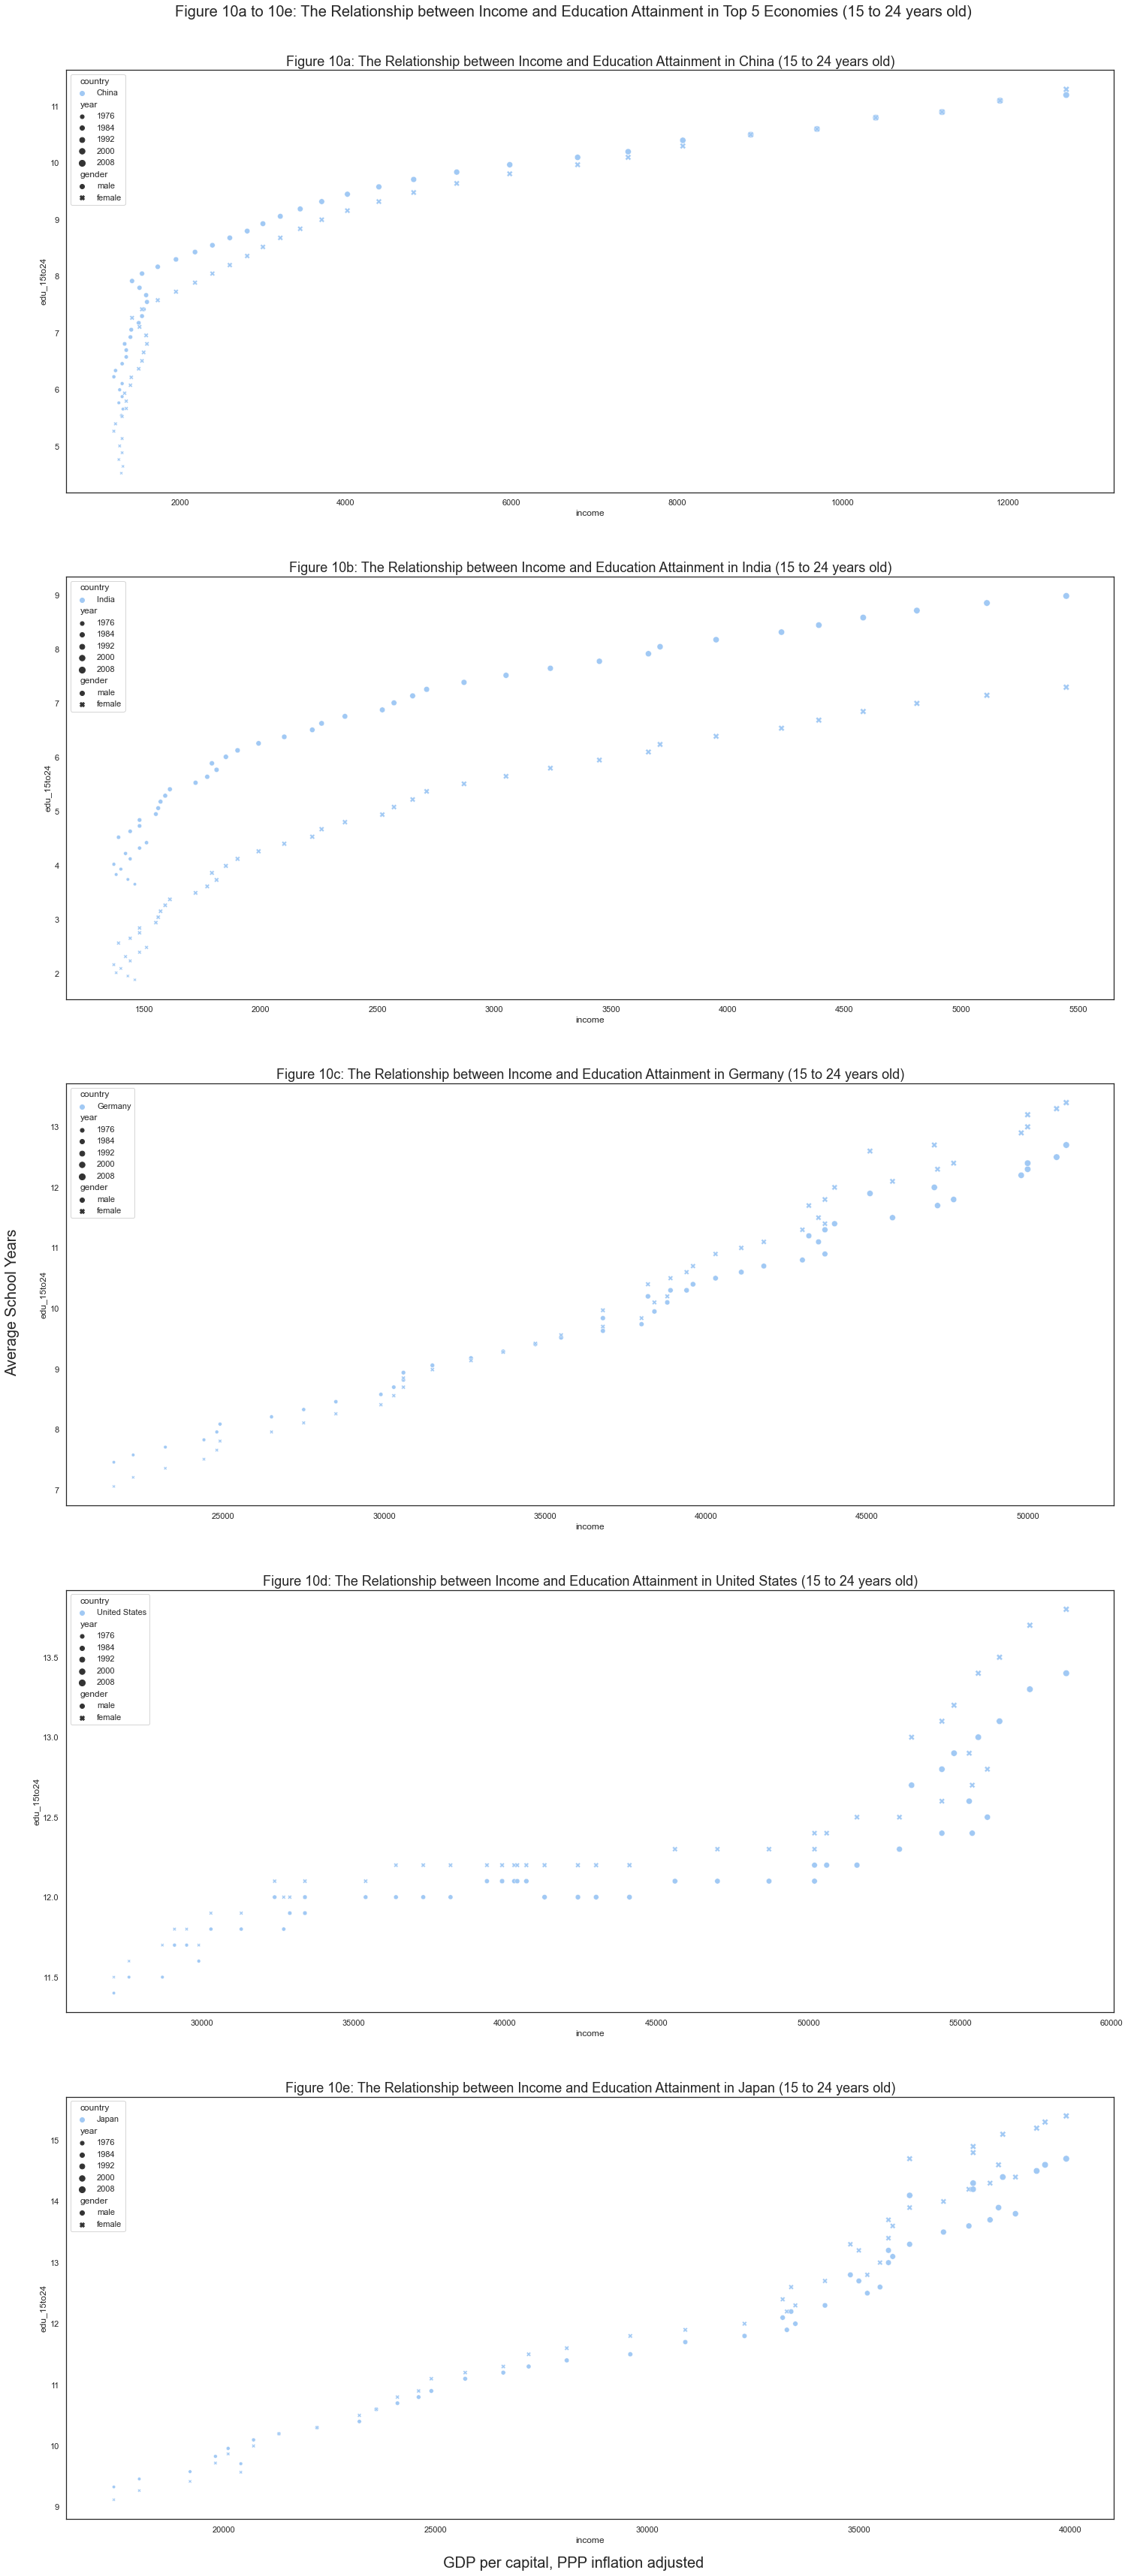

In [497]:
fig, axes = plt.subplots(5, 1, sharex=False, figsize=(25,60))

fig.suptitle('Figure 10a to 10e: The Relationship between Income and Education Attainment in Top 5 Economies (15 to 24 years old)',fontsize = 20,y=0.9)
fig.text(0.5, 0.11, 'GDP per capital, PPP inflation adjusted', ha='center', fontsize = 20)
fig.text(0.08, 0.5, 'Average School Years', va='center', rotation='vertical', fontsize = 20)

country = ['China','India','Germany','United States','Japan']
index = ['a','b','c','d','e']

def ScatterPlot(pos,country,index):
    sns.scatterplot(ax=axes[pos,], data=df_top5[(df_top5["country"] == country) & (df_top5["year"] >= 1969) & (df_top5["year"] <=2014)], x = "income", y= "edu_15to24", hue = 'country',  style = 'gender', size = 'year')
    axes[pos,].set_title("Figure 10" + index + ": The Relationship between Income and Education Attainment in " + country + " (15 to 24 years old)", fontsize = 18)

for i,j in enumerate(country):
    ScatterPlot(i,j,index[i])

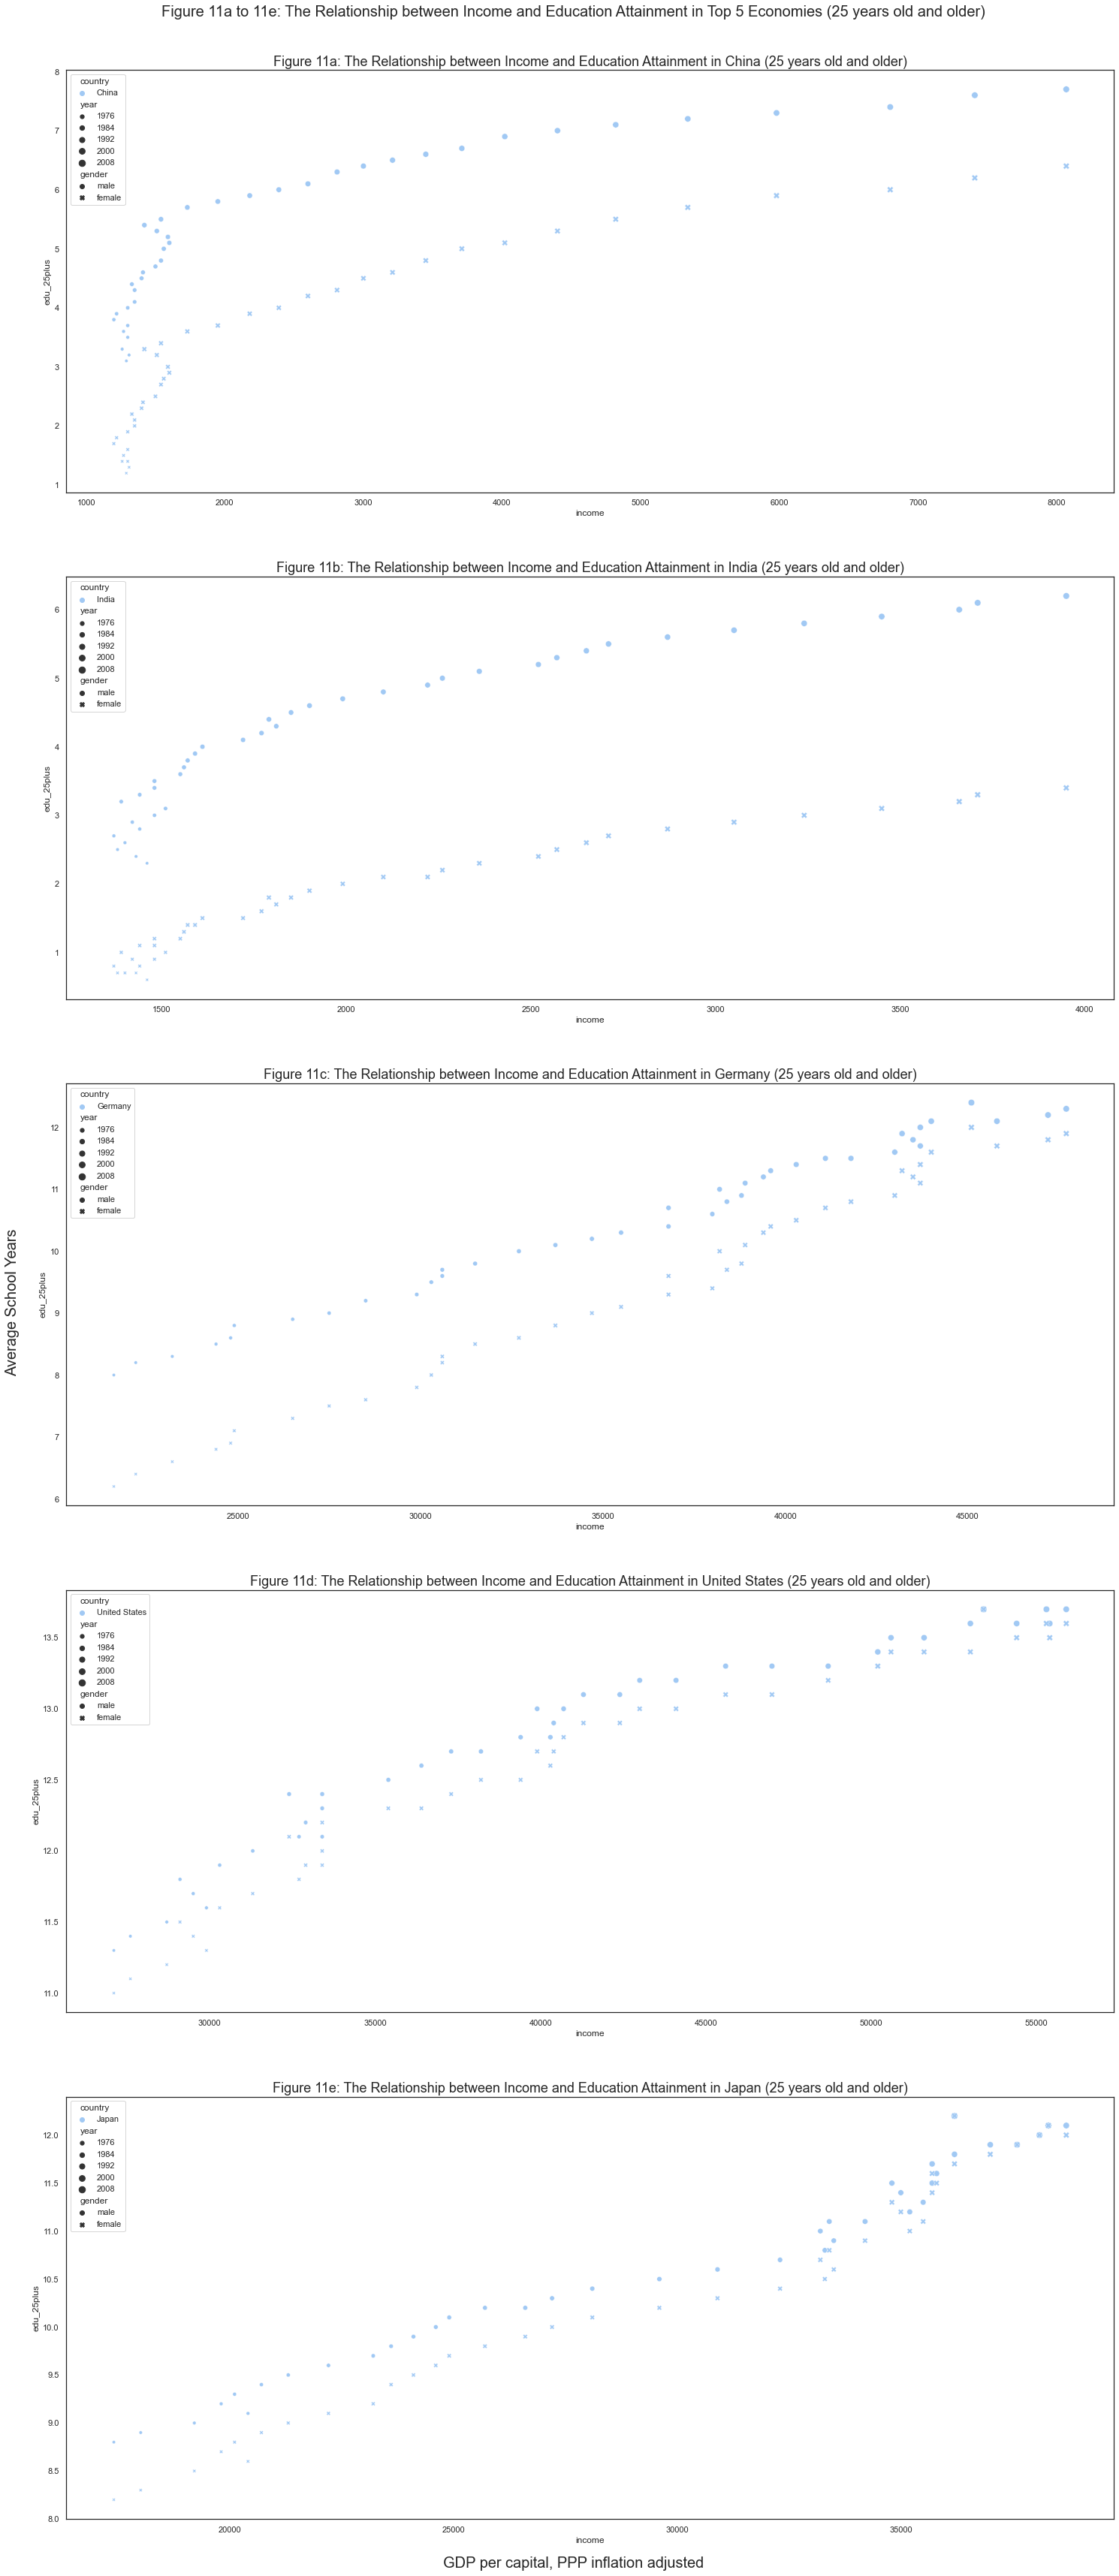

In [496]:
fig, axes = plt.subplots(5, 1, sharex=False, figsize=(25,60))

fig.suptitle('Figure 11a to 11e: The Relationship between Income and Education Attainment in Top 5 Economies (25 years old and older)',fontsize = 20,y=0.9)
fig.text(0.5, 0.11, 'GDP per capital, PPP inflation adjusted', ha='center', fontsize = 20)
fig.text(0.08, 0.5, 'Average School Years', va='center', rotation='vertical', fontsize = 20)

def ScatterPlot(pos,country,index):
    sns.scatterplot(ax=axes[pos,], data=df_top5[(df_top5["country"] == country) & (df_top5["year"] >= 1969) & (df_top5["year"] <=2008)], x = "income", y= "edu_25plus", hue = 'country',  style = 'gender', size = 'year')
    axes[pos,].set_title("Figure 11" + index + ": The Relationship between Income and Education Attainment in " + country + " (25 years old and older)", fontsize = 18)

for i,j in enumerate(country):
    ScatterPlot(i,j,index[i])

**calculate the correlation coefficients between income and average age groups**

In [269]:
df_top5.drop(columns=['year','gini']).groupby(['country','gender']).corr()

income  edu_15to24  edu_25plus
country       gender                                           
China         female income        1.00        0.87        0.90
                     edu_15to24    0.87        1.00        1.00
                     edu_25plus    0.90        1.00        1.00
              male   income        1.00        0.87        0.85
                     edu_15to24    0.87        1.00        1.00
                     edu_25plus    0.85        1.00        1.00
Germany       female income        1.00        0.99        0.99
                     edu_15to24    0.99        1.00        1.00
                     edu_25plus    0.99        1.00        1.00
              male   income        1.00        0.99        0.99
                     edu_15to24    0.99        1.00        1.00
                     edu_25plus    0.99        1.00        1.00
India         female income        1.00        0.95        0.96
                     edu_15to24    0.95        1.00        1.00
                     edu_25plus    0.96        1.00        1.00
              male   income        1.00        0.93        0.91
                     edu_15to24    0.93        1.00        1.00
                     edu_25plus    0.91        1.00        1.00
Japan         female income        1.00        0.97        0.98
                     edu_15to24    0.97        1.00        1.00
                     edu_25plus    0.98        1.00        1.00
              male   income        1.00        0.97        0.98
                     edu_15to24    0.97        1.00        1.00
                     edu_25plus    0.98        1.00        1.00
United States female income        1.00        0.88        0.97
                     edu_15to24    0.88        1.00        0.93
                     edu_25plus    0.97        0.93        1.00
              male   income        1.00        0.87        0.96
                     edu_15to24    0.87        1.00        0.92
                     edu_25plus    0.96        0.92        1.00

#### Takeaways from Figure 10 a-e and 11 a-e and the statistics table: 
* There was a strong correlation between income and education attainment in both age groups for both genders and in all top 5 economies (r = [0.87,0.99])

#### Q6. How does income inequality affects education attainment in the top 5 economies??

**create scatter plots to virsualize the trends**

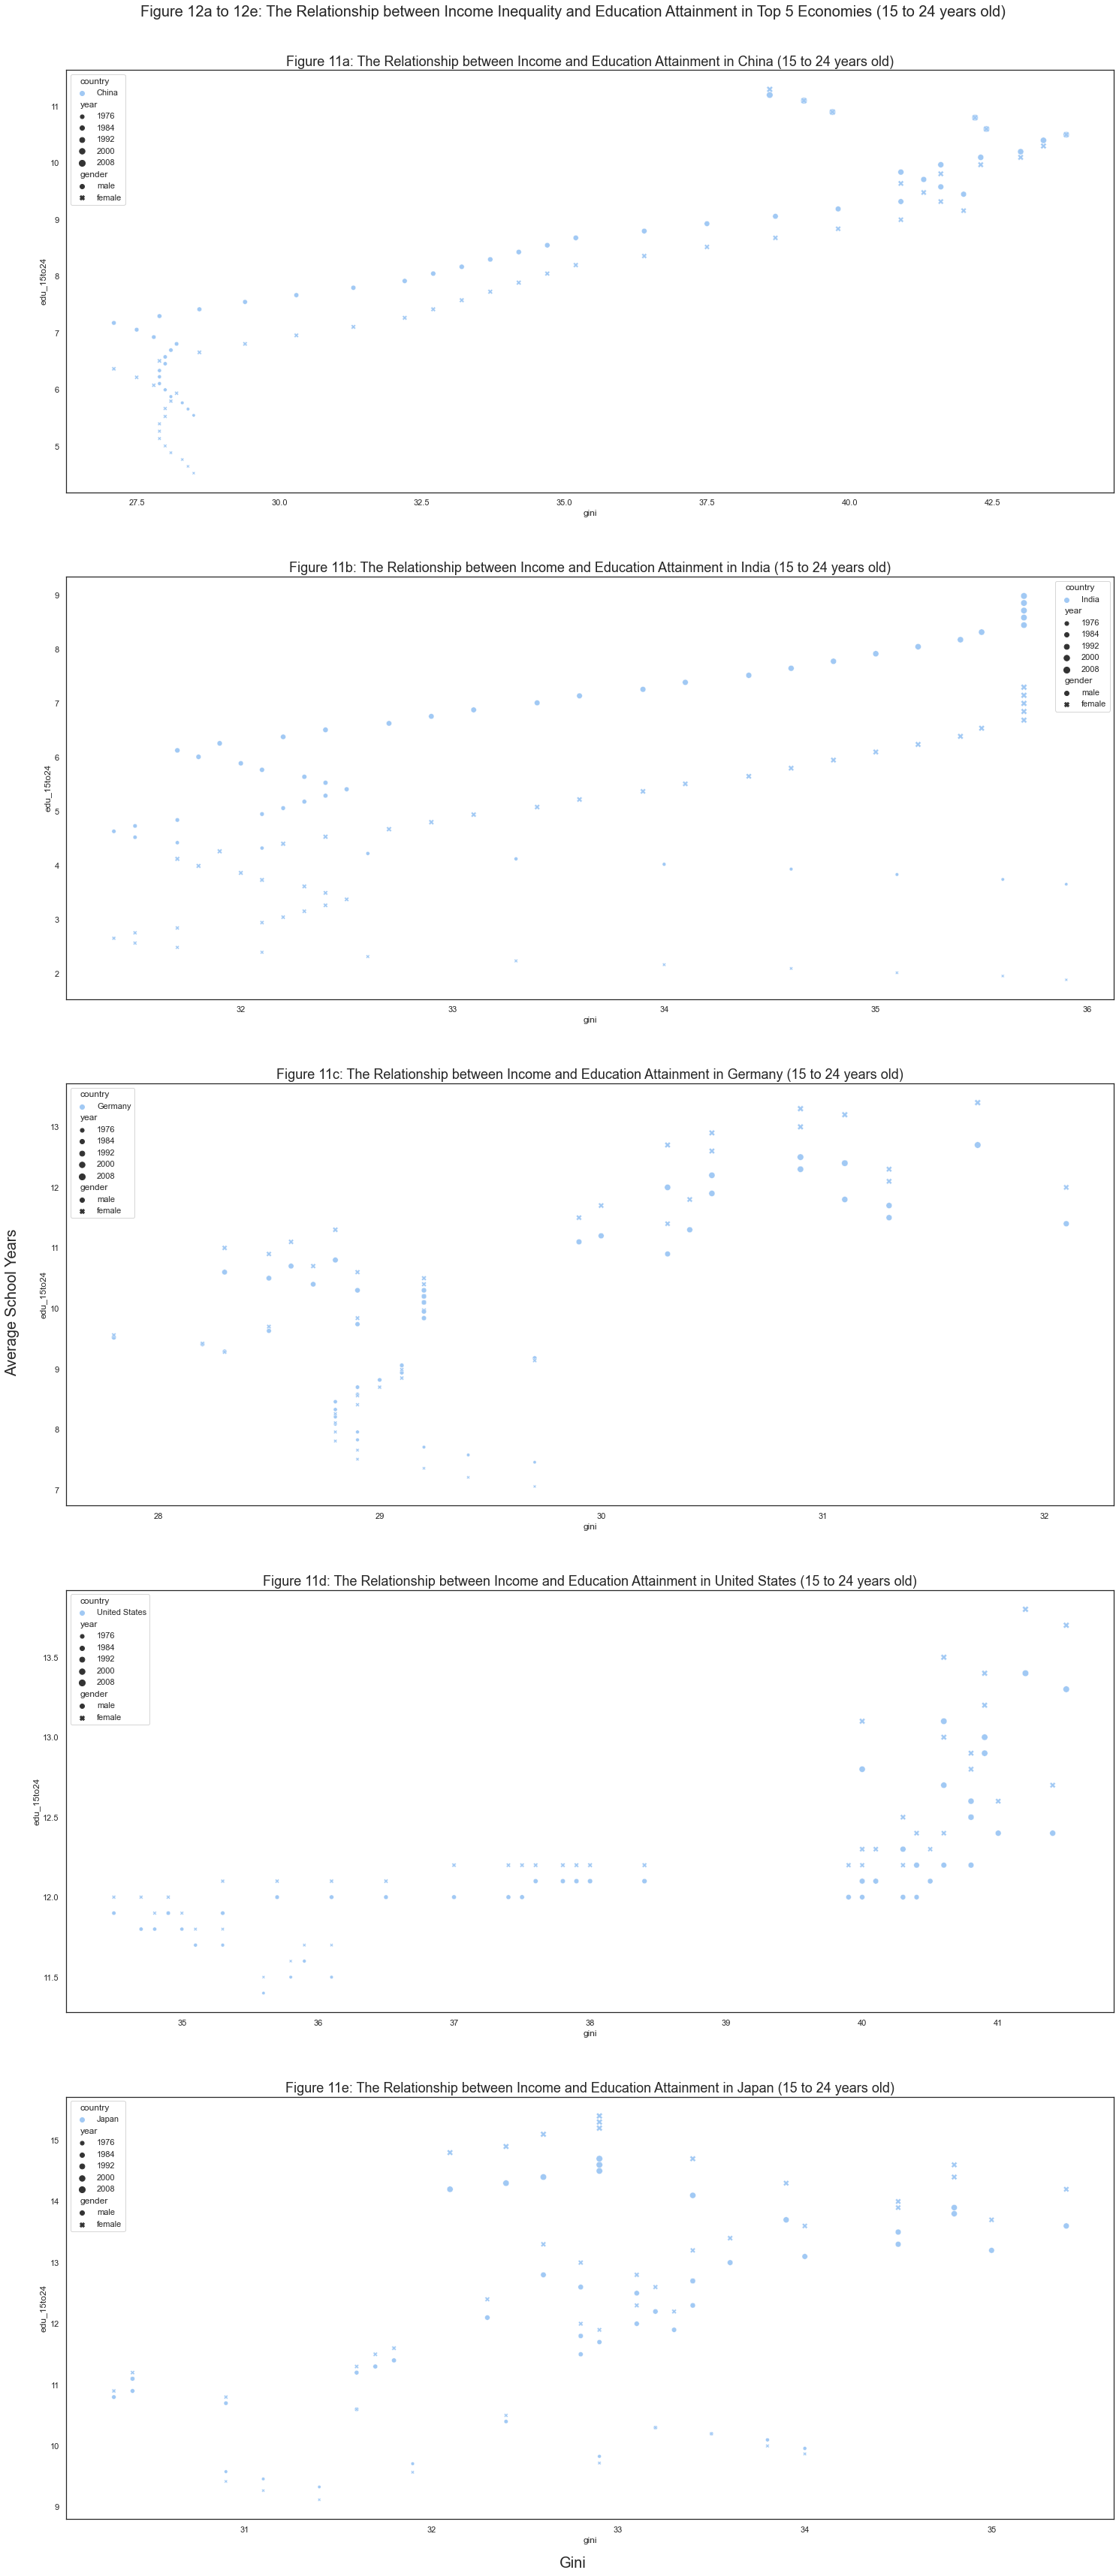

In [498]:
fig, axes = plt.subplots(5, 1, sharex=False, figsize=(25,60))

fig.suptitle('Figure 12a to 12e: The Relationship between Income Inequality and Education Attainment in Top 5 Economies (15 to 24 years old)',fontsize = 20,y=0.9)
fig.text(0.5, 0.11, 'Gini', ha='center', fontsize = 20)
fig.text(0.08, 0.5, 'Average School Years', va='center', rotation='vertical', fontsize = 20)

def ScatterPlot(pos,country,index):
    sns.scatterplot(ax=axes[pos,], data=df_top5[(df_top5["country"] == country) & (df_top5["year"] >= 1969) & (df_top5["year"] <=2014)], x = "gini", y= "edu_15to24", hue = 'country',  style = 'gender', size = 'year')
    axes[pos,].set_title("Figure 11" + index + ": The Relationship between Income and Education Attainment in " + country + " (15 to 24 years old)", fontsize = 18)

for i,j in enumerate(country):
    ScatterPlot(i,j,index[i])

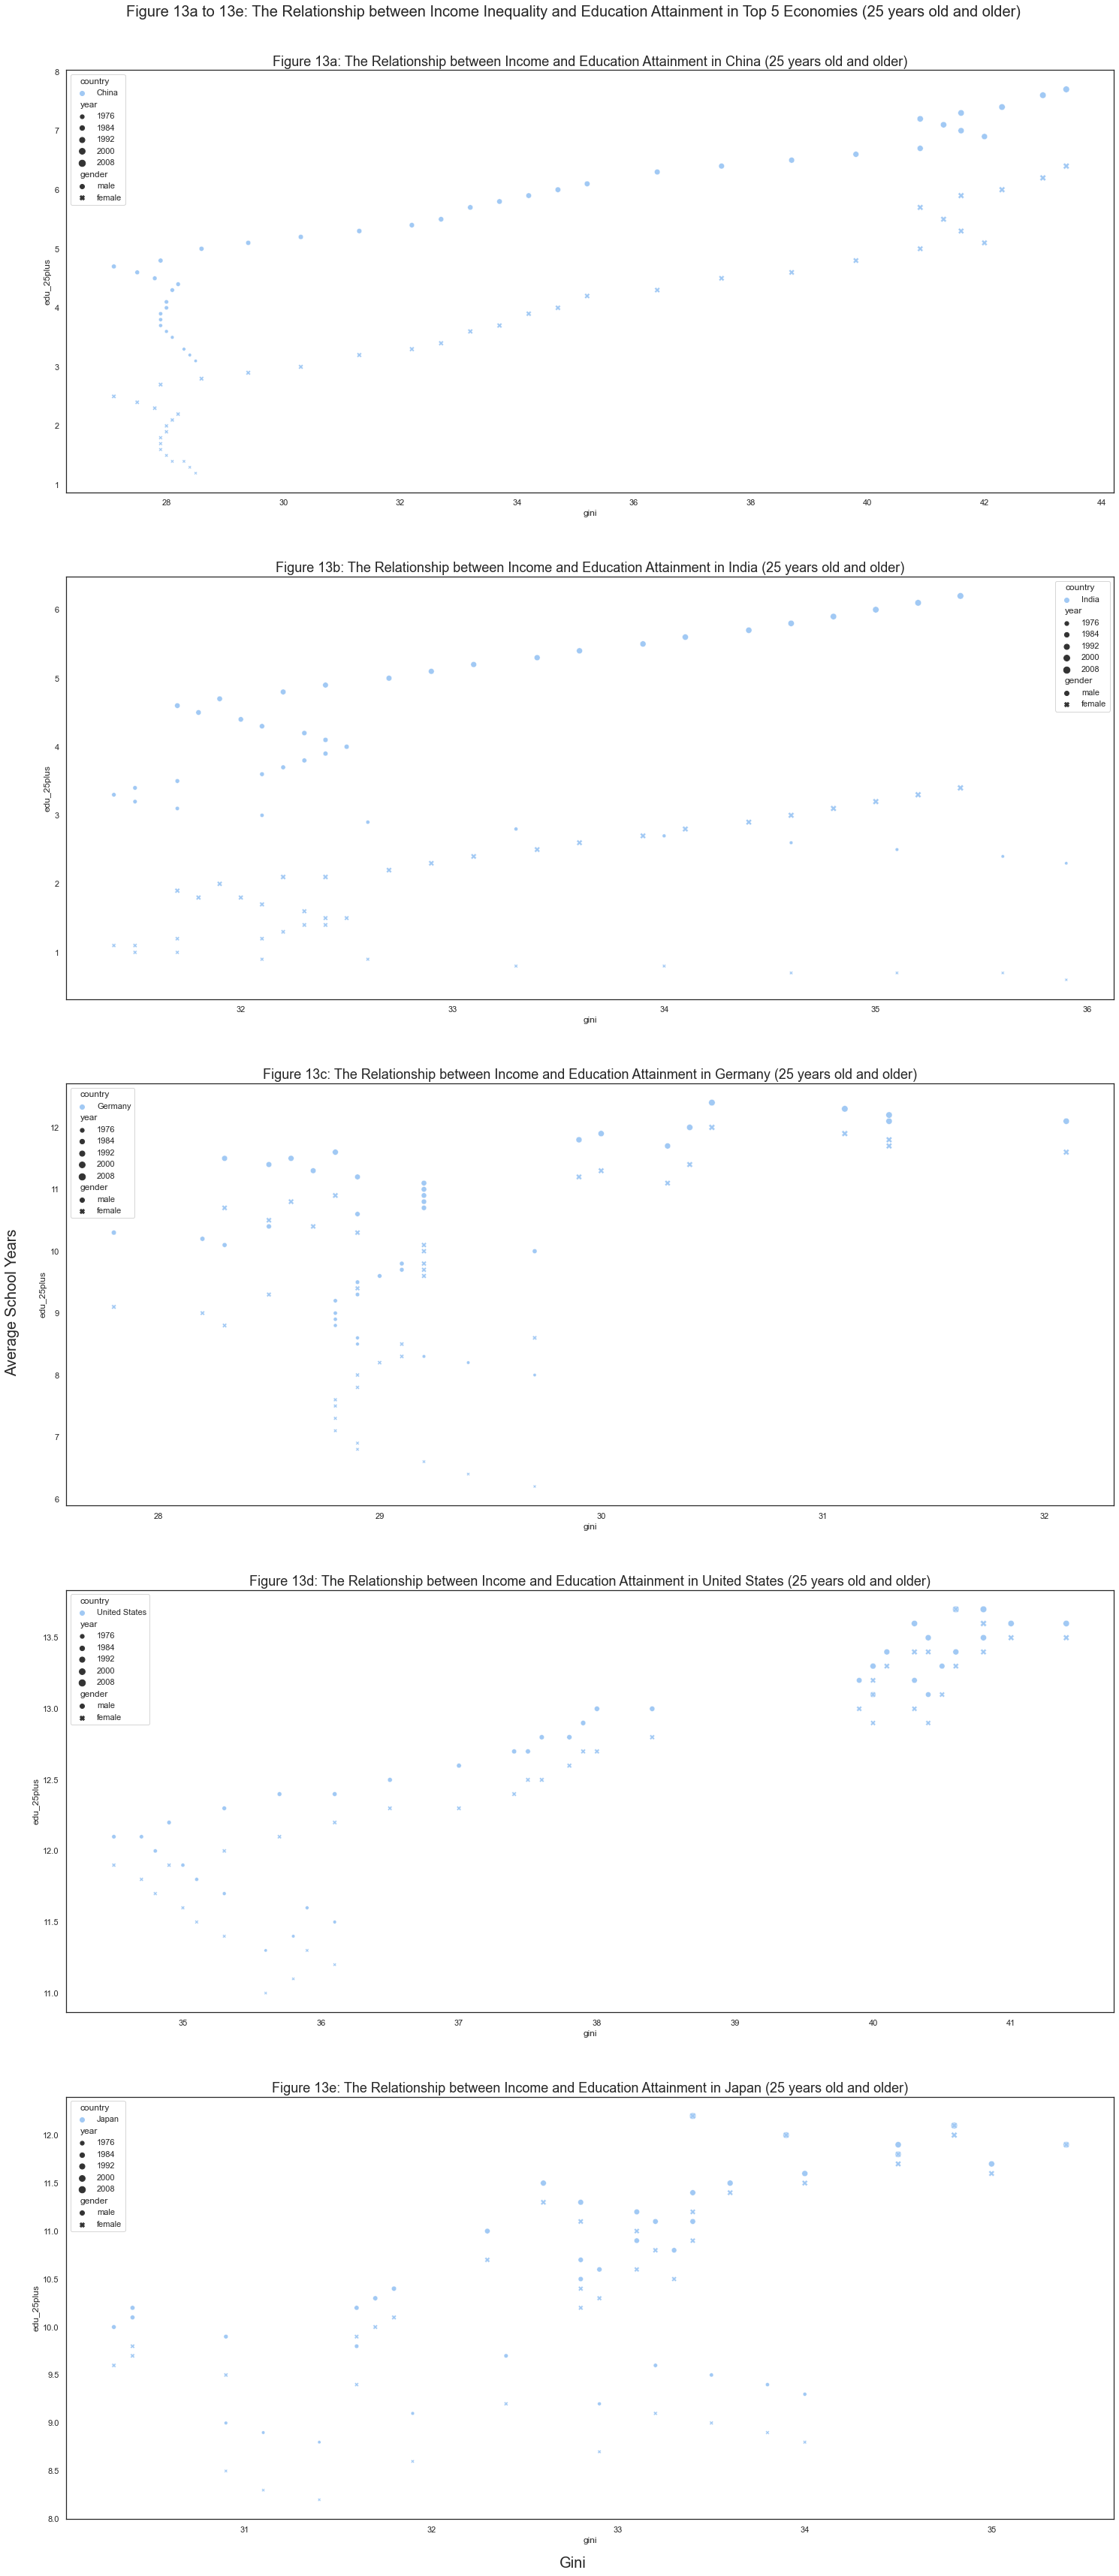

In [495]:
fig, axes = plt.subplots(5, 1, sharex=False, figsize=(25,60))

fig.suptitle('Figure 13a to 13e: The Relationship between Income Inequality and Education Attainment in Top 5 Economies (25 years old and older)',fontsize = 20,y=0.9)
fig.text(0.5, 0.11, 'Gini', ha='center', fontsize = 20)
fig.text(0.08, 0.5, 'Average School Years', va='center', rotation='vertical', fontsize = 20)

def ScatterPlot(pos,country,index):
    sns.scatterplot(ax=axes[pos,], data=df_top5[(df_top5["country"] == country) & (df_top5["year"] >= 1969) & (df_top5["year"] <=2008)], x = "gini", y= "edu_25plus", hue = 'country',  style = 'gender', size = 'year')
    axes[pos,].set_title("Figure 13" + index + ": The Relationship between Income and Education Attainment in " + country + " (25 years old and older)", fontsize = 18)

for i,j in enumerate(country):
    ScatterPlot(i,j,index[i])

**calculate the correlation coefficients between gini and average age groups**

In [275]:
df_top5.drop(columns=['year','income']).groupby(['country','gender']).corr()

gini  edu_15to24  edu_25plus
country       gender                                         
China         female gini        1.00        0.93        0.96
                     edu_15to24  0.93        1.00        1.00
                     edu_25plus  0.96        1.00        1.00
              male   gini        1.00        0.93        0.94
                     edu_15to24  0.93        1.00        1.00
                     edu_25plus  0.94        1.00        1.00
Germany       female gini        1.00        0.68        0.51
                     edu_15to24  0.68        1.00        1.00
                     edu_25plus  0.51        1.00        1.00
              male   gini        1.00        0.68        0.49
                     edu_15to24  0.68        1.00        1.00
                     edu_25plus  0.49        1.00        1.00
India         female gini        1.00        0.55        0.33
                     edu_15to24  0.55        1.00        1.00
                     edu_25plus  0.33        1.00        1.00
              male   gini        1.00        0.51        0.21
                     edu_15to24  0.51        1.00        1.00
                     edu_25plus  0.21        1.00        1.00
Japan         female gini        1.00        0.51        0.65
                     edu_15to24  0.51        1.00        1.00
                     edu_25plus  0.65        1.00        1.00
              male   gini        1.00        0.50        0.64
                     edu_15to24  0.50        1.00        1.00
                     edu_25plus  0.64        1.00        1.00
United States female gini        1.00        0.75        0.92
                     edu_15to24  0.75        1.00        0.93
                     edu_25plus  0.92        0.93        1.00
              male   gini        1.00        0.73        0.92
                     edu_15to24  0.73        1.00        0.92
                     edu_25plus  0.92        0.92        1.00

#### Takeaways from Figure 12 a-e and 13 a-e and the statistics table: 
* There was a strong correlation between income inequality and education attainment in both age groups for both genders in China (r = [0.93,0.96]), which is also the strongest correlation among top 5 economies.
* The correlation between income inequality and education attainment is weaker in the younger age group (15-24 yrs) (r = [0.73-0.75]) for both genders in the US than in the older age group (25 yrs+) (r = [0.92, 0.93]).
* Such correlation is only moderate in Japan and Germany in both age groups for both genders (r = [0.49, 0.68])
* The weakest correlation between income inequality and education attainment was found in India in the older age group (25 yrs +) (r = [0.21,0.33])

#### Q7. How does gender affects education attainment in the top 5 economies?

**create bar charts to visualize gender gap in education attainment**

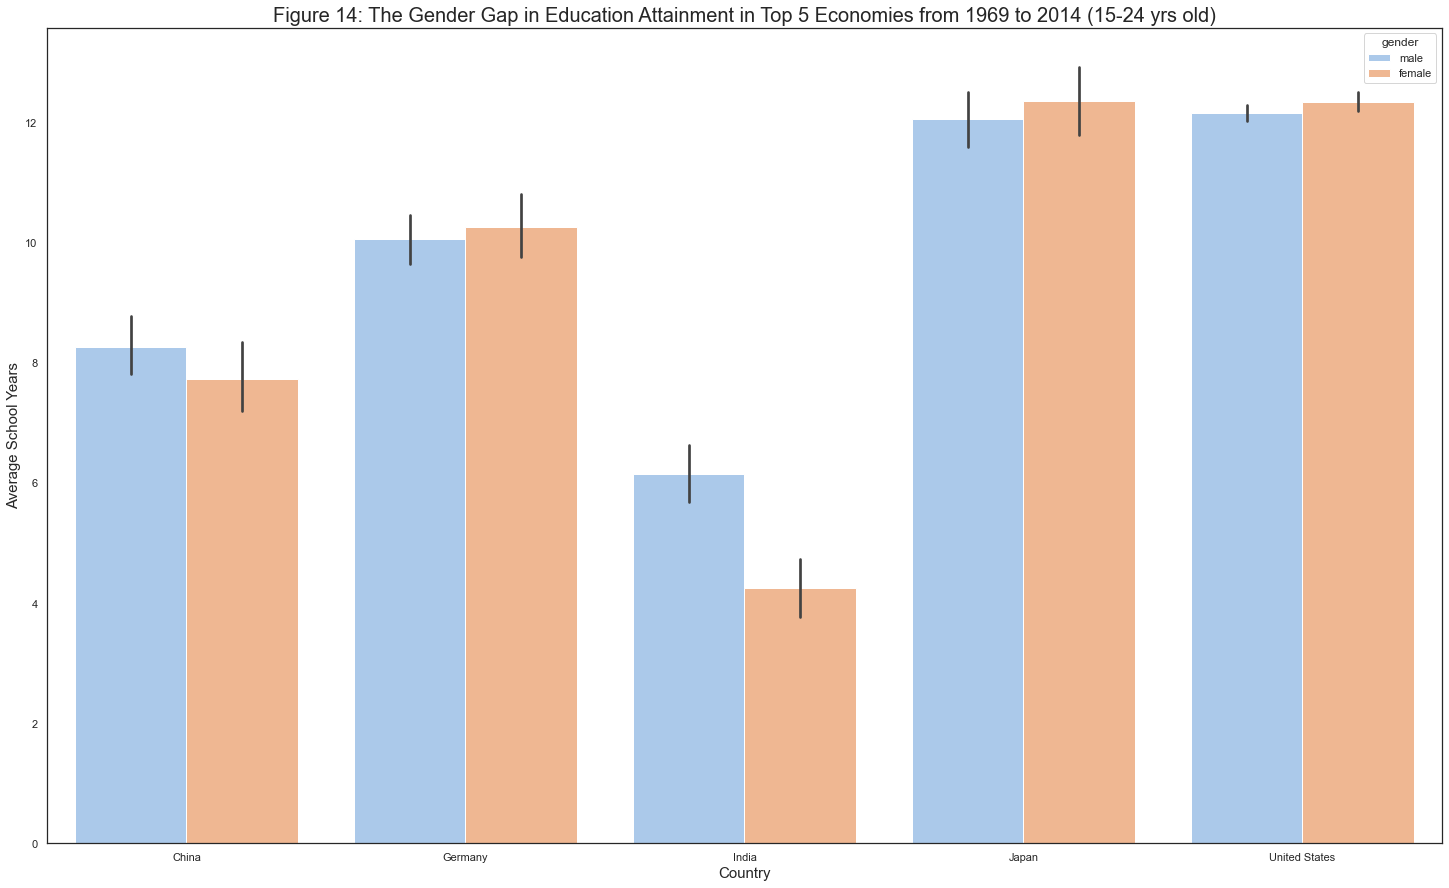

In [308]:
plt.figure(figsize = (25,15))
plt.title('Figure 14: The Gender Gap in Education Attainment in Top 5 Economies from 1969 to 2014 (15-24 yrs old)', {'fontsize':20})

sns.barplot(data=df_top5, x = 'country', y="edu_15to24", hue = 'gender')

plt.xlabel('Country', fontsize = 15)
plt.ylabel('Average School Years',fontsize=15)

plt.show()

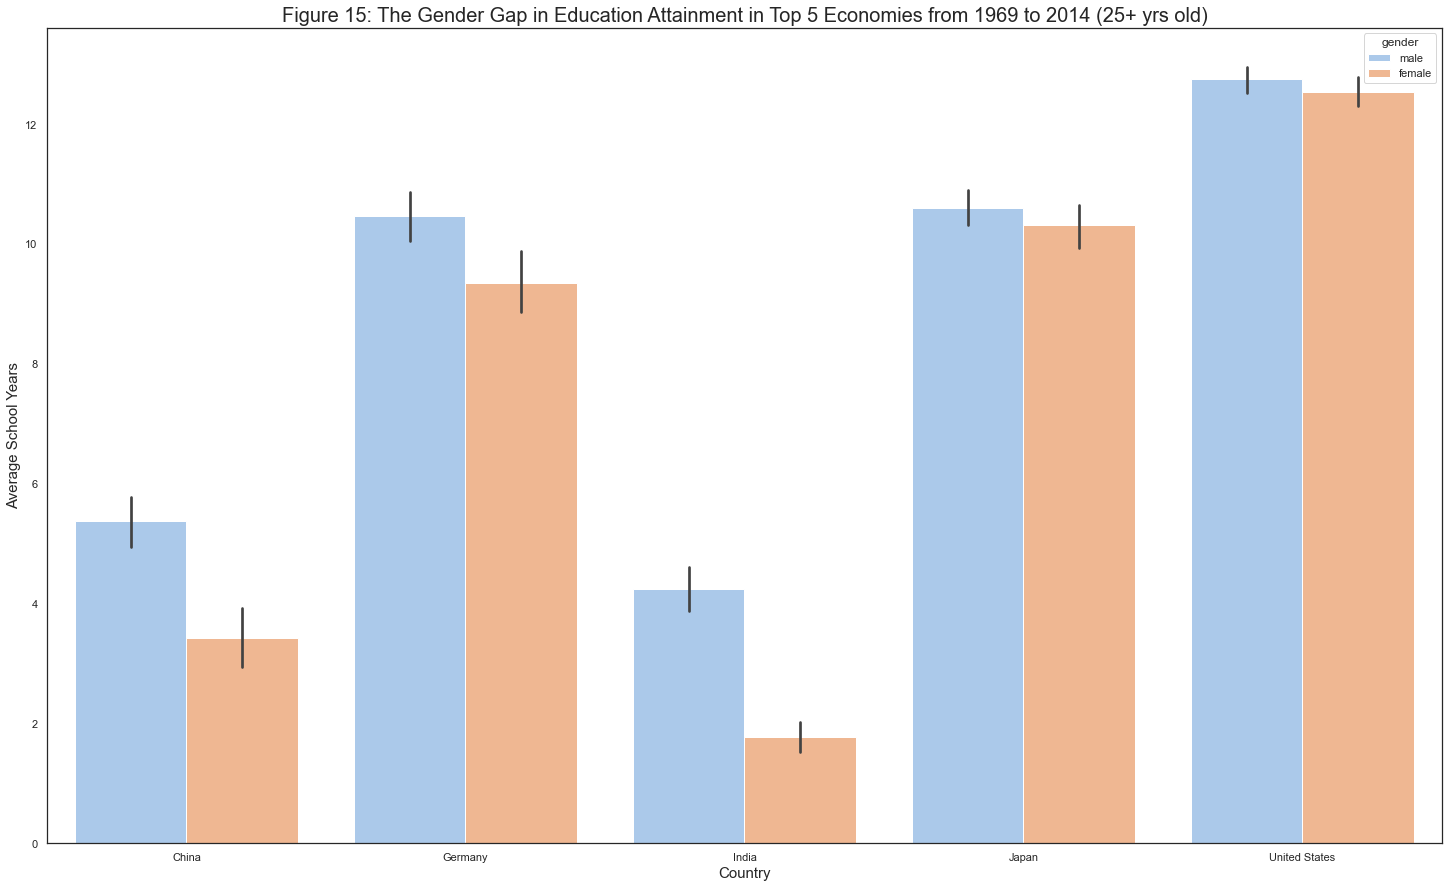

In [309]:
plt.figure(figsize = (25,15))
plt.title('Figure 15: The Gender Gap in Education Attainment in Top 5 Economies from 1969 to 2014 (25+ yrs old)', fontsize = 20)


sns.barplot(data=df_top5, x = 'country', y="edu_25plus", hue = 'gender')

plt.xlabel('Country', fontsize = 15)
plt.ylabel('Average School Years',fontsize=15)

plt.show(fig)

**conduct two-way ANOVA test on the gender/country difference in education attainment**

In [310]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

*2 (gender) by 5 (country) with interaction design*

In [330]:
anova_all1 = ols('edu_15to24 ~ C(gender) + C(country) + C(gender):C(country)', data=df_top5).fit()
anova_all1 = sm.stats.anova_lm(model, typ=2)
anova_all1
print('ALL COUNTRIES, 15-24yrs:', '\n', anova_all1)

anova_all2 = ols('edu_25plus ~ C(gender) + C(country) + C(gender):C(country)', data=df_top5).fit()
anova_all2 = sm.stats.anova_lm(model, typ=2)
anova_all2
print('ALL COUNTRIES, 25+yrs:', '\n', anova_all2)

ALL COUNTRIES, 15-24yrs: 
                       sum_sq     df      F  PR(>F)
C(gender)              14.09   1.00   5.68    0.02
C(country)           3322.46   4.00 334.78    0.00
C(gender):C(country)   80.31   4.00   8.09    0.00
Residual             1116.50 450.00    NaN     NaN
ALL COUNTRIES, 25+yrs: 
                       sum_sq     df      F  PR(>F)
C(gender)              14.09   1.00   5.68    0.02
C(country)           3322.46   4.00 334.78    0.00
C(gender):C(country)   80.31   4.00   8.09    0.00
Residual             1116.50 450.00    NaN     NaN


**conduct one-way ANOVA to see if the gender gap in education attainment is significant in each country**

In [421]:
def ANOVA (model,country,agegroup):
    anova_model = ols(model, data = df_top5[(df_top5["country"] == country)]).fit()
    anova_table  = sm.stats.anova_lm(anova_model, typ=2)
    print (country, ',', agegroup,':', '\n', anova_table, '\n')

model1 = 'edu_15to24 ~ C(gender)'
model2 = 'edu_25plus ~ C(gender)'
agegroup1 = '15-24 yrs'
agegroup2 = '25+ yrs'
                                              
country = ['China','India','Germany','United States','Japan']

for i in list(country):
    ANOVA(model1,i,agegroup1)
    ANOVA(model2,i,agegroup2)
    print("-----------------")
                                              

China , 15-24 yrs : 
            sum_sq    df    F  PR(>F)
C(gender)    6.74  1.00 1.93    0.17
Residual   315.26 90.00  NaN     NaN 

China , 25+ yrs : 
            sum_sq    df     F  PR(>F)
C(gender)   75.86  1.00 34.74    0.00
Residual   170.31 78.00   NaN     NaN 

-----------------
India , 15-24 yrs : 
            sum_sq    df     F  PR(>F)
C(gender)   83.75  1.00 31.20    0.00
Residual   241.62 90.00   NaN     NaN 

India , 25+ yrs : 
            sum_sq    df      F  PR(>F)
C(gender)  122.02  1.00 117.78    0.00
Residual    80.80 78.00    NaN     NaN 

-----------------
Germany , 15-24 yrs : 
            sum_sq    df    F  PR(>F)
C(gender)    0.95  1.00 0.33    0.57
Residual   259.75 90.00  NaN     NaN 

Germany , 25+ yrs : 
            sum_sq    df     F  PR(>F)
C(gender)   24.53  1.00 10.34    0.00
Residual   185.01 78.00   NaN     NaN 

-----------------
United States , 15-24 yrs : 
            sum_sq    df    F  PR(>F)
C(gender)    0.88  1.00 3.60    0.06
Residual    22.02 9

**conduct regression analysis to see the relative strength of income and income inequality in predicting education attainment in each country**

In [424]:
import statsmodels.formula.api as smf

In [468]:
regression_model_all = smf.ols('edu_15to24 ~ income + gini', data = df_top5).fit()
regression_model_all2 = smf.ols('edu_25plus ~ income + gini', data = df_top5).fit()

print(regression_model_all.summary())
print(regression_model_all2.summary())

                            OLS Regression Results                            
Dep. Variable:             edu_15to24   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     619.8
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          6.78e-131
Time:                        16:01:30   Log-Likelihood:                -877.26
No. Observations:                 460   AIC:                             1761.
Df Residuals:                     457   BIC:                             1773.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1062      0.623      1.774      0.0

In [467]:
def LinearReg (model,country):
    regression_model = smf.ols(model, df_top5[(df_top5["country"] == country)]).fit()
    print(country, '\n', regression_model.summary())

model1 = 'edu_15to24 ~ income + gini'
model2 = 'edu_25plus ~ income + gini'
                                              
country = ['China','India','Germany','United States','Japan']

for i in list(country):
    LinearReg(model1,i)
    print('\n')
    LinearReg(model2,i)
    print('\n')

China 
                             OLS Regression Results                            
Dep. Variable:             edu_15to24   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     386.6
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           1.30e-44
Time:                        15:59:59   Log-Likelihood:                -83.717
No. Observations:                  92   AIC:                             173.4
Df Residuals:                      89   BIC:                             181.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3872      0.503      0.770 

In [460]:
def LinearReg (model,country,gender):
    regression_model = smf.ols(model, df_top5[(df_top5["country"] == country) & (df_top5["gender"] == gender)]).fit()
    print(country, ',', gender, '\n', regression_model.summary())

model1 = 'edu_15to24 ~ income + gini'
model2 = 'edu_25plus ~ income + gini'
                                              
country = ['China','India','Germany','United States','Japan']

for i in list(country):
    LinearReg(model1,i,'male')
    print('\n')
    LinearReg(model2,i,'male')
    print('\n')
    LinearReg(model1,i,'female')
    print('\n')
    LinearReg(model2,i,'female')
    print('\n')                               

China , male 
                             OLS Regression Results                            
Dep. Variable:             edu_15to24   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     245.3
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           3.05e-24
Time:                        15:43:10   Log-Likelihood:                -30.889
No. Observations:                  46   AIC:                             67.78
Df Residuals:                      43   BIC:                             73.26
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3942      0.570     

#### Takeaways from Figure 14 and 15 and the statistics tables: 
* There were significant gender gaps in education attainment in both age groups in India (ps < 0.01).
* There were also significant gender gap in education attainment in the older age group (25yrs+) in China and Germany (ps < 0.01) but not in the younger age groups (15-24 yrs) (ps > 0.15).
* There were significant gender gaps in  education attainment in the younder age group (15-24 yrs) (p = 0.06) not in the older age group (25yrs+) (p = 0.21) in the US.
* There was no age gap in education attainment in Japan (ps >= 0.24).
* Both income and income inequality are significant predictors of education attainmnet in the younger age group (15-24 yrs)  for 4 out of the top 5 economies (ps < 0.001) except for Japan for both genders. However, income inequality is not a significant predictor of education attainment in the older age group (25 yrs+) in the US (both genders), Germany (men only) and Japan (both genders).
* Aggregating the data across the five countries, both income and income inequality are significant predictors of education attainmnet in both age groups (ps < 0.001).

<a id='conclusions'></a>
## Conclusions

<b> According to EDA and statistics test, we conclude as the following:
    
 * The trend in income:
    * The top 5 economies witnessed the increase in income (measured in GDP per capital adjusted for PPP) since 18th century. The upward trend in income sped up since 1950 for developed countries (i.e.,the US, Japan and Germany) and since 1990s for developing countries (i.e., China and India). 
    * The US (vs India) has the highest (vs lowest) income and increase in income.
    and the increase in income inequality (measured by Gini) in the past half century, supported by the positive correlation between the two variables (r = [0.51,0.94]).
 * The trend in income inequality (measured in gini):
    * Income inequality decreased from 18th century to 1960s but started increasing since 1970. The upward trend is predicted to last for next 10 years, followed by a plateau in inequality afater 2029.
    * China witnessed the largest fluctuation in income inequality, and the increase was most dramatic from 1980 to 2010, due to the Open Door Policy. By contrast, Japan and Germany only experienced moderate fluctuation in income inequality during the same period.
    * In the past decade, the US overtook China and became the most unequal country among the top 5 economies and Germany is the most equal one.
 * The trend in education attainment (measured in average school years):
    * Except for the US where the education attaiment remained flat from 1969 to 2008 (for 25+ yrs) /2014 (for 15-24 yrs), other top economies witnessed a constant upward trend in education attainment.
    * India has the largest gender gap in educaiton attainment in both age groups while China managed to diminish the education gap in older generation. More specifically, average ducation years were siginificantly higher among men than their female counterparts over 25 years old in India, China and Germany. Such gender gap was not found in Japan and the US for either age group.
 * Relationship between income, income inequality and education:
    * Income and income inequality were negatively correlated from 18th century to late 1960s. However, the two variables start to be positvely correlated since 1970s. Ths correlation is weakest in Japan and strongest in the US.
    * Income are strongly positively correlated with education attainment in all top 5 economies.
    * Income inequality are also positively correlated with education attainment in all top 5 economies, but the strength varies: India sees the lowest correlation and China sees the strongest correlation.
    * After controlling for income inequality, income is still a significant predictor of education attainment in both age groups and in all top 5 economies.
    * After controlling for income, income inequality is still a significant predictor for education attaiment for people from 15 to 24 years old in all top 5 economies except for Japan where no impact of inequality was found. Interestingly, after controlling for income, income inequality is a significant predictor for education attaiment for people from 25 years old and older only in developing countries (i.e., China and India).
    * Aggregating the data across the 5 countries, both income and income inequality are significant predictors of education attainmnet in both age groups after controlling for the other.

### Limitations
<b> A cavet of this mini project is that no causal inference can be made. All statistic analyses (ANOVA, regression, person correlation) are all correlational in nature. To address this issue, controlled experiments can be conducted or economterics method can be used to establish the causaulity.

------